# 📊 Análisis descriptivo del Conjunto de Datos
Antes de llevar a cabo el desarrollo de los modelos de clasificación mediante redes neuronales, es necesario efectuar un **análisis exploratorio de los datos y su correcta depuración**. En esta etapa adecuaremos el conjunto de datos para la fase de modelización posterior, asegurándonos de que no haya observaciones incoherentes ni valores atípicos o perdidos que puedan afectar la calidad de los modelos.

In [1]:
# =============================================================================
# LIBRERIAS
# =============================================================================

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import os

from sklearn.decomposition import PCA # Implementación del Análisis de Componentes Principales (PCA).
from sklearn.preprocessing import StandardScaler # Estandarización de datos para análisis estadísticos.

# Importamos las bibliotecas necesarias
from scipy.spatial import distance
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import fcluster
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from scipy.spatial.distance import pdist, squareform
import warnings

# Establecer el nivel de advertencias a "ignore" para ignorar todas las advertencias
warnings.filterwarnings("ignore")

In [2]:
# Cargamos las funciones que vamos a utilizar
from utils.FuncionesMineria import *

## 🔹 1. Importación del conjunto de datos
El primer paso consiste en cargar el conjunto de datos en nuestro entorno de trabajo. Estos datos están almacenados en un archivo CSV llamado `btc_historical_data.csv`, cuya creación y obtención se explican en el notebook `01_feature_engineering.ipynb`. Para ello, se utiliza el siguiente fragmento de código:

In [3]:
# Importamos CSV

df_bitcoin = pd.read_csv('../01_data_preparation/data/btc_historical_data.csv')                         
df_bitcoin

,Open time,Open,High,Low,Close,Volume,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,...,transaction_rate,market_cap_usd,average_block_size,market_price_usd,exchange_volume_usd,average_confirmation_time,hash_rate,difficulty,miners_revenue,total_transaction_fees
0,2017-10-05,4208.59,4355.00,4110.00,4292.43,779.138638,3.295533e+06,9158.0,351.042019,1.483037e+06,...,2.791667,7.120069e+10,1.018034,4211.55,2.127088e+08,111.082550,6.983443e+06,1.123863e+12,7.562751e+06,160.344240
1,2017-10-06,4318.99,4417.00,4292.00,4369.00,506.529176,2.212035e+06,6546.0,226.148177,9.881066e+05,...,2.866667,7.255732e+10,0.920436,4318.58,2.057251e+08,31.514477,8.882940e+06,1.123863e+12,9.444311e+06,149.021202
2,2017-10-07,4369.00,4479.50,4312.56,4423.00,297.597500,1.302533e+06,4804.0,145.313076,6.371469e+05,...,2.550000,7.216553e+10,0.836508,4369.57,1.915422e+08,20.892141,8.827072e+06,1.123863e+12,9.178387e+06,108.215564
3,2017-10-08,4425.00,4658.00,4425.00,4640.00,518.462004,2.347356e+06,7580.0,280.094854,1.268661e+06,...,2.666667,7.419533e+10,0.764420,4439.46,1.281929e+08,20.239779,1.016789e+07,1.123863e+12,1.098203e+07,111.796475
4,2017-10-09,4640.00,4889.98,4550.00,4786.95,646.463145,3.040509e+06,10372.0,350.756559,1.654275e+06,...,3.283333,7.648983e+10,0.921536,4605.66,2.516054e+08,23.698470,8.994675e+06,1.123863e+12,1.016728e+07,149.340987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2872,2025-08-16,117342.04,117898.99,117143.98,117380.66,6393.681170,7.517194e+08,1179842.0,2995.228650,3.521588e+08,...,2.975000,2.344190e+12,1.665970,117419.50,3.855598e+08,8.231568,9.780076e+08,1.294352e+14,5.629125e+07,2.989912
2873,2025-08-17,117380.66,118575.00,117172.21,117405.01,5898.641920,6.956292e+08,1177563.0,2804.731130,3.307994e+08,...,2.658333,2.352079e+12,1.523959,117484.12,1.547407e+08,5.932923,9.780076e+08,1.294352e+14,5.711806e+07,2.540358
2874,2025-08-18,117405.01,117543.75,114640.14,116227.05,17741.469250,2.053300e+09,3345487.0,7647.218200,8.850528e+08,...,3.316667,2.305944e+12,1.562829,117455.50,1.693708e+08,10.626850,9.908761e+08,1.294352e+14,5.770019e+07,3.392547
2875,2025-08-19,116227.05,116725.69,112732.58,112872.94,18065.420860,2.065005e+09,3291170.0,8609.360780,9.840874e+08,...,3.283333,2.294257e+12,1.739986,116251.12,4.406906e+08,12.908552,8.621909e+08,1.294352e+14,4.993566e+07,3.270740


## 🔹 2. Asignación correcta de los tipos de variables
Una vez que tenemos disponible el conjunto de datos, el siguiente paso consiste en evaluar el tipo de variable que ha sido asignado a cada columna. Esta verificación es esencial para asegurarnos de que los datos se interpreten correctamente. Por ejemplo, es importante que las fechas estén en formato `datetime`, los valores numéricos como `float` o `int`, y las variables categóricas como `object` o `category`.

In [4]:
# Comprobamos el tipo de formato de las variables
for col, dtype in df_bitcoin.dtypes.items():
    print(f"{col}: {dtype}")

Open time: object
Open: float64
High: float64
Low: float64
Close: float64
Volume: float64
Quote asset volume: float64
Number of trades: float64
Taker buy base asset volume: float64
Taker buy quote asset volume: float64
Target: int64
SMA_20: float64
Close_SMA_ratio_20: float64
SMA_50: float64
Close_SMA_ratio_50: float64
EMA_20: float64
Close_EMA_ratio_20: float64
EMA_50: float64
Close_EMA_ratio_50: float64
MACD: float64
MACD_signal: float64
MACD_diff: float64
PSAR: float64
KAMA_10: float64
Close_KAMA_ratio: float64
RSI_7: float64
RSI_14: float64
WR_7: float64
WR_14: float64
STOCH_K_7: float64
STOCH_D_7: float64
STOCH_K_14: float64
STOCH_D_14: float64
ROC_5: float64
ROC_10: float64
ROC_14: float64
MOM_5: float64
MOM_10: float64
dRSI_7: float64
dRSI_14: float64
dROC_5: float64
dROC_10: float64
dROC_14: float64
dMOM_5: float64
dMOM_10: float64
BB_high_10: float64
BB_low_10: float64
BB_mid_10: float64
BB_width_10: float64
BB_percent_10: float64
BB_high_20: float64
BB_low_20: float64
BB_mid_

> 👉 Todas las variables del conjunto de datos presentan un tipo de dato correctamente asignado, con excepción de dos casos: la variable **`Open time`**, que ha sido interpretada como tipo `object` cuando debería ser `datetime`, y la variable objetivo **`Target`**, que ha sido asignada como tipo `int64` cuando, por su naturaleza categórica, debería ser `object`.

En consecuencia, procedemos a realizar las conversiones correspondientes:

In [5]:
# Asignamos el tipo correcto a la variable Open time

df_bitcoin['Open time'] = pd.to_datetime(df_bitcoin['Open time'], format='%Y-%m-%d')
df_bitcoin['Target'] = df_bitcoin['Target'].astype(str)

for col in ['Open time', 'Target']:
    print(f"{col}: {df_bitcoin.dtypes[col]}")

Open time: datetime64[ns]
Target: object


Por otro lado, es relevante considerar que, si alguna variable cuantitativa dispone de un número de valores distintos inferior a 10, se recomienda tratarla como una variable cualitativa. Con este fin, nos apoyaremos en la función **`cuentaDistintos()`**, que verifica cuántos valores distintos posee cada una de las variables cuantitativas:

In [6]:
# Cuenta el número de valores distintos de cada una de las variables numéricas de un DataFrame
df_distintos = cuentaDistintos(df_bitcoin)

# Luego filtramos las columnas con 10 o menos valores distintos
filtrado = df_distintos[df_distintos['Distintos'] <= 10]

filtrado

,Columna,Distintos


> 👉 Si analizamos el resultado, observamos que todas las variables cuantitativas que componen nuestro dataset cuentan con más de diez valores diferentes. En consecuencia, no será necesario realizar la conversión en ningún caso. 

## 🔹 3. Análisis Exploratorio

### 📈 Análisis de la variables catégoricas
Comenzamos con el análisis descriptivo básico de las variables categóricas que participan en el conjunto de datos con la función **`analizar_variables_categoricas()`**. Esta mide la frecuencia correspondiente de cada una de las categorías, lo que nos capacita para revisar que todas ellas estén correcta y suficientemente representadas:

In [7]:
# Frecuencias de los valores en las variables categóricas
analizar_variables_categoricas(df_bitcoin)

{'Target':       n        %
 1  1482  0.51512
 0  1395  0.48488}

> 👉 La variable objetivo `Target` presenta dos categorías claramente definidas: `1` y `0`, con una distribución relativamente equilibrada (51.5% y 48.5%, respectivamente). Esto indica que las categorías están correctamente asignadas y bien representadas.

### 📈 Análisis de la variables numéricas
Del mismo modo, se presenta un análisis descriptivo de las numéricas que participan en el *dataset*. Con el objetivo de facilitar el estudio, se ha dividido el conjunto de datos en varios subconjuntos diferenciados:

-  **Variables de mercado**: Este grupo incluye las variables relacionadas con el comportamiento del mercado financiero, todas de tipo `float64`:
   - `Open`
   - `High`
   - `Low`
   - `Close`
   - `Volume`
   - `Quote asset volume`
   - `Number of trades`
   - `Taker buy base asset volume`
   - `Taker buy quote asset volume`
- **Indicadores técnicos**: Cada grupo de indicadores técnicos tendrá su subconjunto correspondiente (*tendencia*, *momentum*, *volatilidad* y *volumen*)
- **Variables de la blockchain**: Incluye aquellas variables que provienen directamente de la actividad en la red blockchain.
Esta segmentación permite realizar un análisis más enfocado y eficiente, adaptando las técnicas estadísticas y de modelado a la naturaleza de cada grupo de variables.



In [8]:
# =============================================================================
# Obtenemos conjuntos de datos
# =============================================================================

# DF con variables de mercado
df_mercado = df_bitcoin.loc[:, 'Open':'Taker buy quote asset volume']

# DF con indicadores técnicos de tendencia
df_ta_tendencia = df_bitcoin.loc[:, 'SMA_20':'Close_KAMA_ratio']

# DF con indicadores técnicos de momentum
df_ta_momentum = df_bitcoin.loc[:, 'RSI_7':'dMOM_10']

# DF con indicadores técnicos de volatilidad
df_ta_volatilidad = df_bitcoin.loc[:, 'BB_high_10':'DC_width_20']

# DF con indicadores técnicos de volumen
df_ta_volumen = df_bitcoin.loc[:, 'OBV':'Vol_ratio_50']

# DF con variables de blockchain
df_blockchain = df_bitcoin.loc[:, 'mempool_size':'total_transaction_fees']

#### ➡️ VARIABLES DE MERCADO

In [9]:
calcular_descriptivos(df_mercado)

,count,mean,std,min,25%,50%,75%,max,Asimetria,Kurtosis,Rango
Open,2877.0,3.329525e+04,2.915153e+04,3.211710e+03,9.162210e+03,2.394020e+04,4.888759e+04,1.233064e+05,1.129221,0.449850,1.200947e+05
High,2877.0,3.403855e+04,2.966622e+04,3.276500e+03,9.343820e+03,2.459959e+04,5.012500e+04,1.244740e+05,1.112252,0.395009,1.211975e+05
Low,2877.0,3.250629e+04,2.862927e+04,3.156260e+03,8.913000e+03,2.350225e+04,4.708800e+04,1.189209e+05,1.150004,0.517365,1.157647e+05
Close,2877.0,3.333351e+04,2.918559e+04,3.211720e+03,9.170000e+03,2.395405e+04,4.889100e+04,1.233064e+05,1.129112,0.448125,1.200947e+05
Volume,2877.0,6.555341e+04,7.819809e+04,2.975975e+02,2.664143e+04,4.185816e+04,6.880669e+04,7.607054e+05,3.504560,16.194875,7.604078e+05
Quote asset volume,2877.0,1.786236e+09,1.965746e+09,1.302533e+06,3.811033e+08,1.161659e+09,2.487562e+09,1.746531e+10,2.324403,8.311877,1.746400e+10
Number of trades,2877.0,1.798643e+06,2.130512e+06,4.804000e+03,4.109020e+05,1.075177e+06,2.151711e+06,1.522359e+07,2.310291,6.271161,1.521878e+07
Taker buy base asset volume,2877.0,3.257242e+04,3.892113e+04,1.453131e+02,1.336595e+04,2.089643e+04,3.427692e+04,3.747756e+05,3.531787,16.399940,3.746303e+05
Taker buy quote asset volume,2877.0,8.832056e+08,9.772859e+08,6.371469e+05,1.900037e+08,5.669079e+08,1.237800e+09,8.783916e+09,2.363032,8.619077,8.783279e+09


##### 🔎 **INTERPRETACIÓN**

- **Precios (`Open`, `High`, `Low`, `Close`)**:
    - El precio promedio de apertura, cierre, máximo y mínimo se ubica alrededor de 33,000 USD, con una desviación
    estándar cercana a 29,000 USD, lo que **refleja alta volatilidad**.
    - Los valores extremos muestran un rango entre 3,200 USD y 123,000 USD, con asimetría positiva (≈1.1–1.15), lo
      que indica que existen más valores extremos hacia la derecha (precios altos, picos de precio).
    - La curtosis baja (≈0.4–0.5) sugiere que las distribuciones de precios no presentan colas extremadamente
    - pesadas, pero sí se dan episodios de volatilidad marcada.

> **Nota**: Aunque los máximos en torno a 123,000–124,000 USD puedan parecer un error, se ha verificado en Binance que son correctos. Corresponden a los precios alcanzados los días 13 y 14 de agosto de 2025, tal como se muestra en las imágenes:

![Gráfico BTC](images/binance.png)
![Gráfico BTC2](images/binance2.png)

- **Volumen negociado (`Volume`)**:
    - Volumen medio: 65,553 BTC diarios, con un rango muy amplio hasta 760,000 BTC.
    - Alta asimetría positiva (3.5) y curtosis elevada (16.2), lo que evidencia la presencia de eventos extremos en liquidez.
- **Volumen en dólares (`Quote Asset Volume`)**:
    - Promedio: 1.78 mil millones USD diarios, con picos hasta 17.4 mil millones USD.
    - Distribución con asimetría positiva (2.32) y colas largas (curtosis 8.3) → existen días de actividad extraordinaria.
- **Número de transacciones (`Trades`)**:
    - Promedio: 1.8 millones de operaciones por día, con un máximo superior a 15 millones.
    - La dispersión es alta (std = 2.1 millones), con asimetría positiva (2.3) y curtosis elevada (6.27) → evidencia que el mercado tiene días con incrementos explosivos en actividad.
- **Taker Buy Volume (Volumen de compra)**:
    - En BTC (`Taker buy base asset`): promedio de 32,572 BTC diarios, con un rango máximo de 374,000 BTC.
    - En USD (`Taker buy quote asset volume`): promedio de 883 millones USD diarios, con máximos cercanos a 8.7 mil millones USD.
    - Al igual que el volumen total, muestran asimetría alta (>3) y colas largas (>8 de curtosis), lo que confirma que la presión compradora es muy variable y depende de eventos de mercado.

<br>

> 📌 **CONCLUSIONES CLAVE:**
>- Bitcoin presenta alta volatilidad estructural tanto en precios como en volúmenes.
>- La asimetría positiva en todas las métricas indica que los episodios extremos son más frecuentes hacia el lado alcista (subidas de precio, picos de volumen).
>- Los volúmenes y número de *trades* tienen colas pesadas, reflejando la importancia de días puntuales (crisis, anuncios macroeconómicos...) en la dinámica del mercado.
>- Estos resultados sugieren que se debe considerar no solo la media y desviación estándar, sino también eventos extremos que dominan el comportamiento del activo.

#### ➡️ INDICADORES TÉCNICOS DE TENDENCIA

In [10]:
calcular_descriptivos(df_ta_tendencia)

,count,mean,std,min,25%,50%,75%,max,Asimetria,Kurtosis,Rango
SMA_20,2877.0,32960.720747,28750.488054,3500.048500,9169.046500,23406.857500,48369.591000,118285.325500,1.119416,0.427407,114785.277000
Close_SMA_ratio_20,2877.0,1.013166,0.094159,0.558114,0.963220,1.007506,1.062101,1.662698,0.398184,2.801291,1.104583
SMA_50,2877.0,32372.667366,28033.357371,3619.334600,8928.343400,23439.258000,47334.490600,115995.495400,1.096579,0.363146,112376.160800
Close_SMA_ratio_50,2877.0,1.035241,0.165368,0.523741,0.939448,1.014424,1.130186,2.101538,0.819759,3.052582,1.577797
EMA_20,2877.0,32961.786255,28706.461067,3500.410645,9102.315058,23427.538330,48155.505951,117530.557655,1.116111,0.417392,114030.147010
Close_EMA_ratio_20,2877.0,1.010694,0.080732,0.574306,0.967827,1.006692,1.052948,1.574461,0.245108,2.967469,1.000155
EMA_50,2877.0,32389.947371,27941.780857,3678.001925,8936.834608,23555.486903,47069.073819,115049.562152,1.092847,0.357824,111371.560227
Close_EMA_ratio_50,2877.0,1.027886,0.141333,0.548204,0.943721,1.015095,1.105389,1.961296,0.760556,2.876248,1.413092
MACD,2877.0,273.733667,1417.098968,-5073.278718,-360.853466,58.237124,761.255203,7019.055192,0.769461,3.080244,12092.333910
MACD_signal,2877.0,272.934275,1348.793817,-4435.851793,-330.054777,54.582590,758.663445,6402.010447,0.763575,2.832589,10837.862240


##### 🔎 **INTERPRETACIÓN**

-  **Medias Móviles Simples** (`SMA_20`, `SMA_50`)
    - Precio promedio de SMA20: 32,961 USD y de SMA50: 32,327 USD, con desviaciones estándar elevadas (~28,000 USD), lo que refleja la alta volatilidad histórica de Bitcoin.
    - Los rangos son amplios (de ~ 3,500 USD a ~ 118,000 USD), con una asimetría positiva moderada (~1.09–1.10), lo que indica distribuciones sesgadas hacia precios más altos.
    - La curtosis baja (~0.36–0.42) sugiere distribuciones menos extremas que la normal, sin colas excesivamente pesadas.
- **Ratios de Precio/SMA** (`Close_SMA_ratio_20`, `Close_SMA_ratio_50`):
    - Promedios cercanos a 1.01-1.03, indicando que el precio de cierre históricamente se mantiene ligeramente por encima de las medias móviles.
    - Desviaciones estándar bajas (~0.09-0.16) muestran que las desviaciones del precio respecto a las medias son relativamente controladas.
    - Rangos de 0.52 a 2.10 revelan episodios donde el precio estuvo hasta 52% por debajo y 110% por encima de las medias móviles.
- **Medias Móviles Exponenciales** (`EMA_20`, `EMA_50`):
    - Comportamiento similar a las SMA, con promedios de ~32,962 USD (EMA20) y ~32,389 USD (EMA50).
    - Las EMA muestran asimetría ligeramente superior (~1.11-1.09) comparado con las SMA, sugiriendo mayor sensibilidad a movimientos alcistas extremos.
- **Ratios de Precio/EMA** (`Close_EMA_ratio_20`, `Close_EMA_ratio_50`):
    - Promedios de 1.01-1.03 con comportamiento similar a los ratios SMA.
    - Menor dispersión que los ratios SMA, confirmando que las EMA se ajustan más rápidamente a los cambios de precio.
- **Indicadores MACD**:
    - `MACD`: Media de 273.7 con alta dispersión (std = 1,417), rango extremo de -5,073 a 7,019.
    - `MACD_signal`: Comportamiento similar con menor volatilidad (std = 1,349).
    - `MACD_diff`: Media de 0.8 con alta dispersión (std = 389), mostrando las diferencias entre MACD y su señal.
    - Asimetrías moderadas (~0.76-0.77) y curtosis elevadas (~2.6-3.08) indican distribuciones con colas pesadas hacia valores extremos.
- **Parabolic SAR** (`PSAR`):
    - Promedio de 32,959 USD, prácticamente idéntico a las medias móviles, con características estadísticas similares.
    - Asimetría de 1.16 (la más alta) sugiere mayor sensibilidad a movimientos alcistas extremos.
- **KAMA y su Ratio** (`KAMA_10`, `Close_KAMA_ratio`):
    - KAMA promedio: 33,289 USD con comportamiento estadístico similar a otras medias móviles.
    - Ratio Close/KAMA: promedio 1.001 con la menor dispersión (std = 0.057), indicando que KAMA es el indicador que mejor sigue al precio.
    - Asimetría negativa (-0.39) única en el dataset, sugiriendo que ocasionalmente el precio cae significativamente por debajo de KAMA.

<br>

> 📌 **CONCLUSIONES CLAVE:**

> - Todos los indicadores de tendencia muestran alta volatilidad estructural, reflejando la naturaleza volátil de Bitcoin.
> - Los ratios precio/indicador se mantienen cercanos a 1, sugiriendo que históricamente Bitcoin no se desvía extremadamente de sus tendencias subyacentes por períodos prolongados.
> - KAMA muestra la menor dispersión en su ratio, confirmándose como el indicador más adaptativo y preciso para seguir el precio.
> - La asimetría positiva generalizada indica que los movimientos alcistas extremos son más frecuentes y pronunciados que las correcciones bajistas.
> - Las curtosis elevadas en MACD evidencian la importancia de eventos extremos en la detección de cambios de *momentum*.

#### ➡️ INDICADORES TÉCNICOS DE MOMENTUM

In [11]:
calcular_descriptivos(df_ta_momentum)

,count,mean,std,min,25%,50%,75%,max,Asimetria,Kurtosis,Rango
RSI_7,2877.0,52.882299,18.102692,4.439907,39.536221,51.926155,65.768979,98.006880,0.100681,-0.512852,93.566973
RSI_14,2877.0,52.815384,13.800325,10.497797,43.403208,51.623454,62.029643,93.460719,0.220706,-0.189965,82.962922
WR_7,2877.0,-45.490302,28.123555,-99.720880,-70.677592,-43.631453,-20.012120,-0.122164,-0.139242,-1.275807,99.598716
WR_14,2877.0,-45.167787,28.476128,-99.751156,-70.591843,-43.746770,-18.489164,-0.088272,-0.129150,-1.275138,99.662884
STOCH_K_7,2877.0,54.509698,28.123555,0.279120,29.322408,56.368547,79.987880,99.877836,-0.139242,-1.275807,99.598716
STOCH_D_7,2877.0,54.523042,24.728068,4.317959,33.339017,55.383606,77.444141,98.242361,-0.123262,-1.223969,93.924402
STOCH_K_14,2877.0,54.832213,28.476128,0.248844,29.408157,56.253230,81.510836,99.911728,-0.129150,-1.275138,99.662884
STOCH_D_14,2877.0,54.852702,26.650127,2.541840,30.736525,56.218308,79.768334,98.155984,-0.126890,-1.320529,95.614144
ROC_5,2877.0,0.900404,8.095187,-45.986456,-3.187474,0.505118,4.895205,52.424102,0.129256,2.580233,98.410559
ROC_10,2877.0,1.855557,11.910966,-46.159610,-4.607740,0.959207,7.459075,72.010363,0.509949,2.358158,118.169973


##### 🔎 **INTERPRETACIÓN**

Poner aqui analisis ta momentum

#### ➡️ INDICADORES TÉCNICOS DE VOLATILIDAD

In [12]:
calcular_descriptivos(df_ta_volatilidad)

,count,mean,std,min,25%,50%,75%,max,Asimetria,Kurtosis,Rango
BB_high_10,2877.0,35380.966466,30447.197171,3506.587946,9757.119654,25549.424213,52601.540158,123678.848949,1.067005,0.252371,120172.261002
BB_low_10,2877.0,30936.048810,27602.898217,2962.598491,8275.661297,22434.789383,44826.742643,116769.698122,1.194176,0.671009,113807.099631
BB_mid_10,2877.0,33158.507638,28982.531494,3358.474000,9167.569000,23743.971000,48655.081000,118504.732000,1.124953,0.440026,115146.258000
BB_width_10,2877.0,4444.917656,4237.343958,103.403025,1220.419676,2885.243415,6796.842993,29790.407368,1.502215,2.572317,29687.004343
BB_percent_10,2877.0,0.532340,0.315796,-0.225344,0.274177,0.540691,0.793387,1.230550,-0.082114,-0.946733,1.455894
BB_high_20,2877.0,36177.998102,30820.018393,3637.401000,10095.176281,26320.362892,55388.067875,124134.265631,1.035279,0.160732,120496.864630
BB_low_20,2877.0,29743.443392,26842.907608,2928.349272,7804.987485,21120.074042,43072.527800,116672.986260,1.223666,0.768575,113744.636988
BB_mid_20,2877.0,32960.720747,28750.488054,3500.048500,9169.046500,23406.857500,48369.591000,118285.325500,1.119416,0.427407,114785.277000
BB_width_20,2877.0,6434.554710,5870.961753,217.462423,1882.203185,4272.804285,9704.810269,38159.504642,1.518769,3.023480,37942.042219
BB_percent_20,2877.0,0.542392,0.337396,-0.514776,0.282993,0.551004,0.815407,1.527677,-0.105932,-0.680659,2.042453


##### 🔎 **INTERPRETACIÓN**

Poner aqui analisis ta volatilidad

#### ➡️ INDICADORES TÉCNICOS

In [13]:
calcular_descriptivos(df_ta_volumen)

,count,mean,std,min,25%,50%,75%,max,Asimetria,Kurtosis,Rango
OBV,2877.0,5.859880e+05,1.823265e+06,-4.242190e+06,-6.118149e+05,-7.003110e+04,1.828557e+06,4.760994e+06,0.706962,-0.648308,9.003184e+06
CMF_20,2877.0,7.571064e-02,1.284597e-01,-3.142845e-01,-1.629800e-02,7.150770e-02,1.622061e-01,4.500244e-01,0.074843,-0.304946,7.643088e-01
MFI_14,2877.0,5.195953e+01,1.740330e+01,3.465104e+00,3.970992e+01,5.147964e+01,6.337444e+01,1.000000e+02,0.105796,-0.341611,9.653490e+01
ADL,2877.0,6.546086e+06,4.546016e+06,3.195411e+03,1.541108e+06,8.064424e+06,1.074395e+07,1.279094e+07,-0.202352,-1.544273,1.278774e+07
OBV_diff,2877.0,-1.751814e+02,1.020473e+05,-7.607054e+05,-4.098924e+04,5.898642e+03,4.250545e+04,6.993609e+05,-0.035131,9.301517,1.460066e+06
OBV_roc_5,2877.0,-3.612316e-02,8.223816e+00,-3.376824e+02,-6.897725e-02,-2.407916e-03,6.735448e-02,2.318350e+02,-16.328198,1217.077391,5.695173e+02
OBV_ma20,2877.0,5.876031e+05,1.813595e+06,-2.596717e+06,-6.019153e+05,-7.764758e+04,1.786566e+06,4.639306e+06,0.727048,-0.673984,7.236022e+06
OBV_ma_cross,2877.0,-1.615085e+03,2.441683e+05,-2.227947e+06,-6.568678e+04,2.392418e+03,7.764864e+04,1.881258e+06,-0.506261,15.422339,4.109204e+06
CMF_diff,2877.0,-6.227456e-05,4.344443e-02,-1.630574e-01,-2.867593e-02,2.148470e-04,2.761641e-02,1.826868e-01,0.006286,0.270189,3.457443e-01
CMF_zscore,2877.0,-5.404546e-03,1.246786e+00,-3.618682e+00,-1.002224e+00,-9.590469e-03,9.869746e-01,3.504066e+00,0.015537,-0.809542,7.122749e+00


##### 🔎 **INTERPRETACIÓN**

Poner aqui analisis ta volumen

#### ➡️ VARIABLES DE BLOCKCHAIN

In [14]:
calcular_descriptivos(df_blockchain)

,count,mean,std,min,25%,50%,75%,max,Asimetria,Kurtosis,Rango
mempool_size,2877.0,4.103067e+07,5.933980e+07,2.871695e+05,1.637650e+06,7.640796e+06,6.841872e+07,3.810704e+08,2.113291,5.529574,3.807832e+08
transaction_rate,2877.0,3.472132e+00,8.284501e-01,1.450000e+00,3.008333e+00,3.416667e+00,3.866667e+00,8.800000e+00,1.166307,4.129961,7.350000e+00
market_cap_usd,2877.0,6.421541e+11,5.814722e+11,5.520196e+10,1.645700e+11,4.588720e+11,9.207293e+11,2.406473e+12,1.172646,0.567545,2.351271e+12
average_block_size,2877.0,1.293924e+00,3.250181e-01,4.314518e-01,1.053092e+00,1.264695e+00,1.583604e+00,2.524785e+00,0.252795,-0.266090,2.093334e+00
market_price_usd,2877.0,3.330470e+04,2.915329e+04,3.231910e+03,9.164620e+03,2.395377e+04,4.889765e+04,1.233594e+05,1.129149,0.450103,1.201275e+05
exchange_volume_usd,2877.0,3.575948e+08,3.728743e+08,1.722276e+07,1.322972e+08,2.428741e+08,4.318853e+08,4.956850e+09,3.296360,18.999473,4.939627e+09
average_confirmation_time,2877.0,1.814436e+02,8.524585e+02,3.503122e+00,1.876061e+01,4.076106e+01,9.810156e+01,2.580973e+04,17.045955,404.160694,2.580623e+04
hash_rate,2877.0,2.729253e+08,2.611029e+08,5.426063e+06,8.403318e+07,1.599542e+08,4.064645e+08,1.084829e+09,1.145534,0.144572,1.079403e+09
difficulty,2877.0,3.762655e+13,3.580169e+13,1.123863e+12,1.189059e+13,2.172413e+13,5.415014e+13,1.294352e+14,1.116996,0.020110,1.283114e+14
miners_revenue,2877.0,2.800967e+07,1.578356e+07,4.666604e+06,1.518600e+07,2.440491e+07,3.994676e+07,1.077559e+08,0.712198,-0.230897,1.030893e+08


##### 🔎 **INTERPRETACIÓN**

Poner analisis variables blockchain

## 🔹 4. Análisis de valores atípicos *(outliers)*
Se denominan datos atípicos (*outliers*) a aquellas observaciones cuyos valores distan mucho del resto de valores de la variable. Estos pueden ser originados por un error en la entrada de datos, un error en la codificación o pueden ocurrir como consecuencia de un acontecimiento esporádico. Los datos atípicos representan un problema y tienen una gran influencia en los resultados si los modelos no son robustos, debido a ello, es necesario analizarlos y tratarlos. 

### 📈 Análisis cuantitativo de *outliers*
A continuación, **calculamos la proporción de valores atípicos** para cada una de las variables numéricas. En este caso, también se realizará el estudio sobre los subconjuntos creados previamente para facilitar el análisis:

> 👉 **Nota**: Es importante destacar que, por definición, el número de datos atípicos ha de ser pequeño pues, de lo contrario, no podrán ser considerados como atípicos. En esta instancia, establecemos como criterio que **la proporción de valores atípicos no exceda el 10%** para ser clasificados de dicha manera.

#### ➡️ VARIABLES DE MERCADO

In [15]:
{x: atipicosAmissing(df_mercado[x])[1] / len(df_mercado) for x in df_mercado.columns}

{'Open': 0.0,
 'High': 0.0,
 'Low': 0.0,
 'Close': 0.0,
 'Volume': 0.03962460896767466,
 'Quote asset volume': 0.004171011470281543,
 'Number of trades': 0.010427528675703858,
 'Taker buy base asset volume': 0.03962460896767466,
 'Taker buy quote asset volume': 0.0045185957594716716}

##### 🔎 **INTERPRETACIÓN**
- `Open`, `High`, `Low`, `Close` = 0.0 → No disponemos de valores atípicos en los precios.
- `Volumen` (≈ 3.96%) y `Taker buy base asset volume` (≈ 3.96%) → Un ~4% de los días tiene volúmenes que destacan como atípicos. Esto es bastante esperable en BTC, dado que hay eventos con picos enormes de actividad.
- `Quote asset volume` (≈ 0.42%) y `Taker buy quote asset volume` (≈ 0.45%) → Proporción muy baja, menos del 1%.
- `Number of trades` (≈ 1.04%) → Coherente con jornadas de altísima volatilidad con picos de operaciones.

> 👉 Como ninguna variable excede el límite establecido, se conservarán los valores originales.

#### ➡️ INDICADORES TÉCNICOS DE TENDENCIA

In [16]:
{x: atipicosAmissing(df_ta_tendencia[x])[1] / len(df_ta_tendencia) for x in df_ta_tendencia.columns}

{'SMA_20': 0.0,
 'Close_SMA_ratio_20': 0.005213764337851929,
 'SMA_50': 0.0,
 'Close_SMA_ratio_50': 0.005213764337851929,
 'EMA_20': 0.0,
 'Close_EMA_ratio_20': 0.004866180048661801,
 'EMA_50': 0.0,
 'Close_EMA_ratio_50': 0.005213764337851929,
 'MACD': 0.018421967327076814,
 'MACD_signal': 0.017726798748696558,
 'MACD_diff': 0.014946124435175531,
 'PSAR': 0.0,
 'KAMA_10': 0.0,
 'Close_KAMA_ratio': 0.0010427528675703858}

##### 🔎 **INTERPRETACIÓN**
- `SMA_20`, `SMA_50`, `EMA_20`, `EMA_50`, `PSAR`, `KAMA_10` → 0% de *outliers*.
- **Ratios Close Media**: La proporción de valores atípicos es muy bajo, en torno al 1%. Esto parece indicar que el precio solo se devía "mucho" de la media en algunos días (días con movimientos extremos de precio).
  - `Close_SMA_ratio_20`: ~0.52%
  - `Close_SMA_ratio_50`: ~0.52%
  - `Close_EMA_ratio_20`: ~0.49%
  - `Close_EMA_ratio_50`: ~0.52%
  - `Close_KAMA_ratio`: ~0.10%
- **`MACD`**: Este es el indicador con mayor presencia de *outliers*. Esto tiene sentido debido a que se trata de un indicador hibrído, ya que no solo mide la dirección de la tendencia, sino también la fuerza de ese movimiento (*momentum*). En el ámbito de las criptomonedas, el *momentum* en ocasiones suele ser explosivo.
    - `MACD`: ~1.84%
    - `MACD_signal`: ~1.77%
    - `MACD_diff`: ~1.49%

> 👉 Como ninguna variable excede el límite establecido, se conservarán los valores originales. Además, eliminar estos datos podría implicar la pérdida de señales valiosas que reflejan cambios extremos en la tendencia, los cuales son especialmente relevantes para el análisis.

#### ➡️ INDICADORES TÉCNICOS DE MOMENTUM

In [17]:
{x: atipicosAmissing(df_ta_momentum[x])[1] / len(df_ta_momentum) for x in df_ta_momentum.columns}

{'RSI_7': 0.0,
 'RSI_14': 0.0,
 'WR_7': 0.0,
 'WR_14': 0.0,
 'STOCH_K_7': 0.0,
 'STOCH_D_7': 0.0,
 'STOCH_K_14': 0.0,
 'STOCH_D_14': 0.0,
 'ROC_5': 0.0045185957594716716,
 'ROC_10': 0.005561348627042058,
 'ROC_14': 0.006604101494612443,
 'MOM_5': 0.020507473062217587,
 'MOM_10': 0.017726798748696558,
 'dRSI_7': 0.0031282586027111575,
 'dRSI_14': 0.0072992700729927005,
 'dROC_5': 0.0045185957594716716,
 'dROC_10': 0.005908932916232186,
 'dROC_14': 0.009732360097323601,
 'dMOM_5': 0.021202641640597843,
 'dMOM_10': 0.025721237400069517}

##### 🔎 **INTERPRETACIÓN**
- `RSI` (7 y 14), `Williams %R` (7 y 14), `Stochastic K/D` (7 y 14) → 0% de *outliers*.
- **`ROC` (Rate of Change)**: La proporción de valores atípicos es inferior al 1%. Se observa que, a medida que el periodo analizado se extiende, aumenta el número de outliers. Esto es lógico, ya que un mayor intervalo temporal conlleva una mayor probabilidad de variaciones significativas.
    - `ROC_5`: ~0.45%
    - `ROC_10`: ~0.55%
    - `ROC_14`: ~0.66%
- **Momentum Simple (`MOM`)**: Mayor presencia de valores atípicos ~2%. Esto es comprensible, ya que el indicador refleja la diferencia entre el precio actual y el pasado. Al no estar normalizado, tiende a mostrar valores elevados durante movimientos extremos del activo.
    - `MOM_5`: ~2.05%
    - `MOM_10`: ~1.77%
- **Diferencias de indicadores (`dRSI`, `dROC`, `dMOM`)**: Se observa una mayor presencia de valores atípicos, especialmente en el indicador `dMOM`. Esto se debe a que, al calcular diferencias, se amplifican los movimientos bruscos del activo.
    - `dRSI_7`: ~0.31%
    - `dRSI_14`: ~0.73%
    - `dROC_5`: ~0.45%
    - `dROC_10`: ~0.59%
    - `dROC_14`: ~0.97%
    - `dMOM_5`: ~2.12%
    - `dMOM_10`: ~2.57%
      
> 👉 Como ninguna variable excede el límite establecido, se conservarán los valores originales. El único caso que podría presentar cierta sensibilidad es el de `MOM`/`dMOM`, ya que los valores atípicos reflejan fuertes shocks en el mercado. Sin embargo, no se eliminarán, dado que estos outliers representan precisamente los movimientos más relevantes. No obstante, podría ser conveniente considerar su escalado o aplicar alguna transformación para mejorar su interpretación en la fase de modelización.

#### ➡️ INDICADORES TÉCNICOS DE VOLATILIDAD

In [18]:
{x: atipicosAmissing(df_ta_volatilidad[x])[1] / len(df_ta_volatilidad) for x in df_ta_volatilidad.columns}

{'BB_high_10': 0.0,
 'BB_low_10': 0.0,
 'BB_mid_10': 0.0,
 'BB_width_10': 0.0006951685783802572,
 'BB_percent_10': 0.0,
 'BB_high_20': 0.0,
 'BB_low_20': 0.0,
 'BB_mid_20': 0.0,
 'BB_width_20': 0.0,
 'BB_percent_20': 0.0,
 'ATR_14': 0.0,
 'ATR_20': 0.0,
 'KC_high_10': 0.0,
 'KC_low_10': 0.0,
 'KC_mid_10': 0.0,
 'KC_width_10': 0.0,
 'KC_high_20': 0.0,
 'KC_low_20': 0.0,
 'KC_mid_20': 0.0,
 'KC_width_20': 0.0,
 'DC_high_20': 0.0,
 'DC_low_20': 0.0,
 'DC_mid_20': 0.0,
 'DC_width_20': 0.0}

##### 🔎 **INTERPRETACIÓN**
Comprobamos que todos los indicadores de volatilidad están libres de *outliers*, con la única excepción de `BB_width_10`, cuya proporción de valores atípicos es mínima (~0.07%) y puede considerarse despreciable.

> 👉 A diferencia de los indicadores técnicos de *momentum*, los indicadores de volatilidad presentan una dinámica mucho más suave, ya que se basan en medias móviles, rangos y el ATR (Average True Range). Asimismo, no exceden el límite establecido y se conservarán los valores originales.

#### ➡️ INDICADORES TÉCNICOS DE VOLUMEN

In [19]:
{x: atipicosAmissing(df_ta_volumen[x])[1] / len(df_ta_volumen) for x in df_ta_volumen.columns}

{'OBV': 0.0,
 'CMF_20': 0.0,
 'MFI_14': 0.0,
 'ADL': 0.0,
 'OBV_diff': 0.026068821689259645,
 'OBV_roc_5': 0.0667361835245047,
 'OBV_ma20': 0.0,
 'OBV_ma_cross': 0.023635731664928744,
 'CMF_diff': 0.0,
 'CMF_zscore': 0.0,
 'MFI_diff': 0.0003475842891901286,
 'MFI_zscore': 0.0,
 'ADL_diff': 0.02537365311087939,
 'ADL_roc_5': 0.08411539798401112,
 'Vol_SMA20': 0.06360792492179354,
 'Vol_SMA50': 0.0740354535974974,
 'Vol_ratio_20': 0.001737921445950643,
 'Vol_ratio_50': 0.003475842891901286}

##### 🔎 **INTERPRETACIÓN**
- `OBV`, `OBV_ma20`, `CMF_20`, `CMF_diff`, `CMF_zscore`, `MFI_14`, `MFI_diff`, `MFI_zscore`, `ADL`, `Vol_ratio_20`, `Vol_ratio_50` → 0% de *outliers*.
- **Diferencias respecto a valores previos** (`OBV_diff`, `OBV_ma_cross`, `ADL_diff`): presentan entre un 2% y 3% de valores atípicos. Esto ocurre porque al calcular diferencias se amplifican los movimientos bruscos de volumen.
    - `OBV_diff`: ~2.6%
    - `OBV_ma_cross`: ~2.3%
    - `ADL_diff`: ~2.5%
- Indicadores basados en cambios porcentuales y medias de volumen (`OBV_roc_5`, `ADL_roc_5`, `Vol_SMA20`, `Vol_SMA50`): mayor presencia de *outliers*, entre 6% y 8%. ambos pueden verse distorsionados por picos anormales en el volumen y los ROC, además, son sensibles a denominadores pequeños.
    - `OBV_roc_5`: ~6.6%
    - `ADL_roc_5`: ~8.4%
    - `Vol_SMA20`: ~6.3%
    - `Vol_SMA50`: ~7.4%
      
> 👉 La mayoría de los indicadores de volumen son robustos y no presentan *outliers* (`OBV`, `CMF`, `MFI`, `ADL`). Los que muestran cierta sensibilidad (`OBV_diff`, `ADL_diff`) reflejan cambios puntuales y, aunque generan algo de ruido, representan reacciones naturales a shocks de mercado. Los casos más problemáticos son los indicadores porcentuales (`ROC`) y las medias largas de volumen (`Vol_SMA`), que concentran hasta un 8% de atípicos. No obstante, estos valores extremos son informativos (picos de volumen), por lo que no deberían eliminarse, aunque sí puede ser útil escalar o transformar estas variables para que no dominen en los futuros modelos. Por lo tanto, se conservarán los valores originales para dichas variables.

#### ➡️ VARIABLES DE BLOCKCHAIN

In [20]:
{x: atipicosAmissing(df_blockchain[x])[1] / len(df_blockchain) for x in df_blockchain.columns}

{'mempool_size': 0.011817865832464372,
 'transaction_rate': 0.0003475842891901286,
 'market_cap_usd': 0.0,
 'average_block_size': 0.0,
 'market_price_usd': 0.0,
 'exchange_volume_usd': 0.009384775808133473,
 'average_confirmation_time': 0.07021202641640598,
 'hash_rate': 0.0,
 'difficulty': 0.0,
 'miners_revenue': 0.0,
 'total_transaction_fees': 0.047966631908237745}

##### 🔎 **INTERPRETACIÓN**
- `market_cap_usd`, `average_block_size`, `market_price_usd`, `hash_rate`, `difficulty`, `miners_revenue` → 0% de *outliers*.
- `transaction_rate`: ~0.03% de outliers. Los picos de actividad en la red podrían explicar la presencia de valores extremos en este caso, aunque la proporción es muy baja e incluso despreciable.
- `exchange_volume_usd`: ~0.94% de outliers. En este contexto, los valores atípicos pueden estar asociados a incrementos repentinos de actividad en los *exchanges*. Esto suele coincidir con *shocks* de mercado (entrada/salida masiva de capital).
- `mempool_size`: ~1.18% de outliers. Refleja acumulaciones atípicas de transacciones no confirmadas. Estos picos suelen corresponder a congestión de red (cuando la demanda de transacciones excede la capacidad de los bloques).
- `total_transaction_fees`: ~4.8% de outliers. Es la segunda variable que más valores atípicos manifiesta. Esto es esperable, ya que las *fees* son muy sensibles a la congestión de la red y pueden dispararse en momentos de alta demanda.

> **Nota**: En *blockchain*, las *fees* (comisiones) son el pago que los usuarios hacen para que sus transacciones sean incluidas en un bloque por los mineros (o validadores).

- `average_confirmation_time`: ~7.0% de outliers. Es la variable con mayor proporción de valores atípicos. El tiempo de confirmación puede dispararse en momentos de saturación de la red o caídas temporales de *hash rate*. Por tanto, aunque los valores extremos reflejan fenómenos reales, aportan bastante variabilidad.

> **Nota**: Una caída temporal de *hash rate* significa que la potencia de cómputo total que los mineros aportan a la red *blockchain* disminuye de forma repentina durante un periodo corto. Causas comunes: cortes de energía, prohibiciones/regulaciones en un país, caída de la rentabilidad.

> 👉 Como ninguna variable excede el límite establecido, se conservarán los valores originales. La mayoría de métricas *blockchain* son estables y no presentan outliers (`market cap`, `difficulty`, `hash_rate`, etc.). Los indicadores más ruidosos son `total_transaction_fees` (≈5%) y `average_confirmation_time` (≈7%). En ambos casos, los *outliers* reflejan episodios de congestión o ineficiencia en la red. Aunque representan ruido estadístico, conviene no eliminarlos, ya que son señales clave de estrés en la *blockchain*.

## 🔹 5. Análisis de valores perdidos
Al igual que los valores atípicos, la presencia de datos faltantes ha de ser analizada y abordada, ya que pueden reducir el número de observaciones válidas para los procedimientos estadísticos. Asimismo, si la presencia de valores perdidos no es aleatoria, y se deciden eliminar estas observaciones, se puede incurrir en un mayor sesgo en los modelos. Inicialmente, verificamos si existe valores perdidos en las variables de nuestro conjunto de datos:

In [21]:
# =============================================================================
# Comprobamos si nuestro conjunto de datos tiene valores perdidos
# =============================================================================

df_missings = df_bitcoin.isna().sum().reset_index()
df_missings.columns = ['columna', 'n_missing']

print(df_missings)
print('')
print('------------------------------------------')
print('')

# Luego filtramos las columnas que tienen valores faltantes
filtrado = df_missings[df_missings['n_missing'] > 0]

filtrado

                      columna  n_missing
0                   Open time          0
1                        Open          0
2                        High          0
3                         Low          0
4                       Close          0
..                        ...        ...
93  average_confirmation_time          0
94                  hash_rate          0
95                 difficulty          0
96             miners_revenue          0
97     total_transaction_fees          0

[98 rows x 2 columns]

------------------------------------------



,columna,n_missing


> 👉 Verificamos que el dataset no contiene valores faltantes. Por lo tanto, no será necesario aplicar ninguna técnica de imputación o tratamiento de datos ausentes.

## 🔹 6. Relaciones entre variables
Para concluir, es crucial identificar si todas las variables explicativas del conjunto de datos están relacionadas con la variable objetivo y si hay variables de entrada que tengan una alta correlación entre sí. Esto tiene como propósito la selección de las variables más relevantes del conjunto de datos antes de la modelización, conservando aquellas que sean más útiles para la predicción del modelo. Adicionalmente, esto nos ayudará a disminuir la carga computacional necesaria en las siguientes etapas de esta práctica.

### 📈 Relaciones entre variables explicativas y variable objetivo
Con el objetivo de medir la relación entre las variables explicativas de nuestro conjunto de datos y las variables objetivo, emplearemos **el estadístico V de Cramer**. Esta métrica basada en el estadístico χ2, permite identificar la relación entre dos variables y tiene la ventaja de capturar relaciones no lineales entre ellas. Cuanto más cercano a cero sea el valor de la V de Cramer, menor será la relación entre las variables, y cuanto más próximo a uno, mayor será la relación. 

Comenzamos el análisis representando gráficamente la V de Cramer de cada una de las variables:

In [22]:
# Añadir la variable objetivo `Target` a cada subset
df_mercado = df_bitcoin.loc[:, 'Open':'Taker buy quote asset volume'].join(df_bitcoin['Target'])
df_ta_tendencia = df_bitcoin.loc[:, 'SMA_20':'Close_KAMA_ratio'].join(df_bitcoin['Target'])
df_ta_momentum = df_bitcoin.loc[:, 'RSI_7':'dMOM_10'].join(df_bitcoin['Target'])
df_ta_volatilidad = df_bitcoin.loc[:, 'BB_high_10':'DC_width_20'].join(df_bitcoin['Target'])
df_ta_volumen = df_bitcoin.loc[:, 'OBV':'Vol_ratio_50'].join(df_bitcoin['Target'])
df_blockchain = df_bitcoin.loc[:, 'mempool_size':'total_transaction_fees'].join(df_bitcoin['Target'])

#### ➡️ Variables mercado

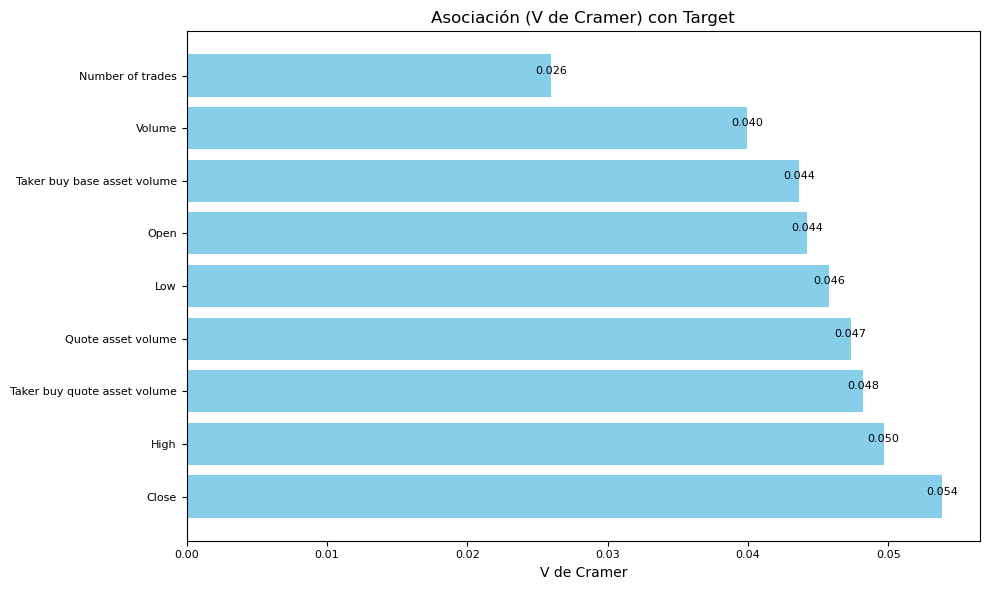

In [23]:
target = df_mercado['Target'] # Variable objetivo
inputs = df_mercado.drop(['Target'], axis = 1) # Variables descriptivas

# --- V de Cramer
graficoVcramer(inputs, target)

#### ➡️ Indicadores técnicos tendencia

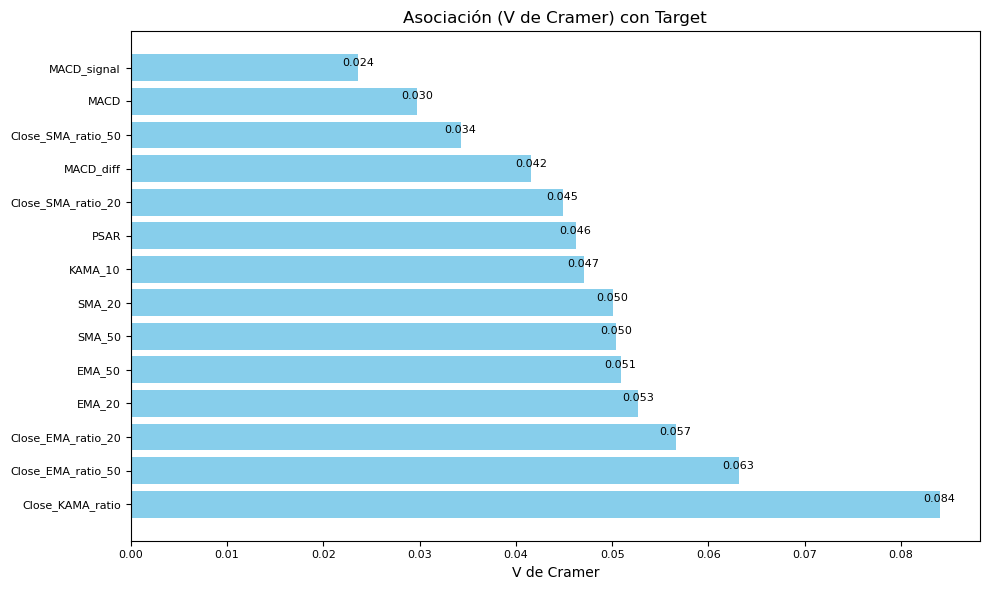

In [24]:
target = df_ta_tendencia['Target'] # Variable objetivo
inputs = df_ta_tendencia.drop(['Target'], axis = 1) # Variables descriptivas

# --- V de Cramer
graficoVcramer(inputs, target)

#### ➡️ Indicadores técnicos *momentum*

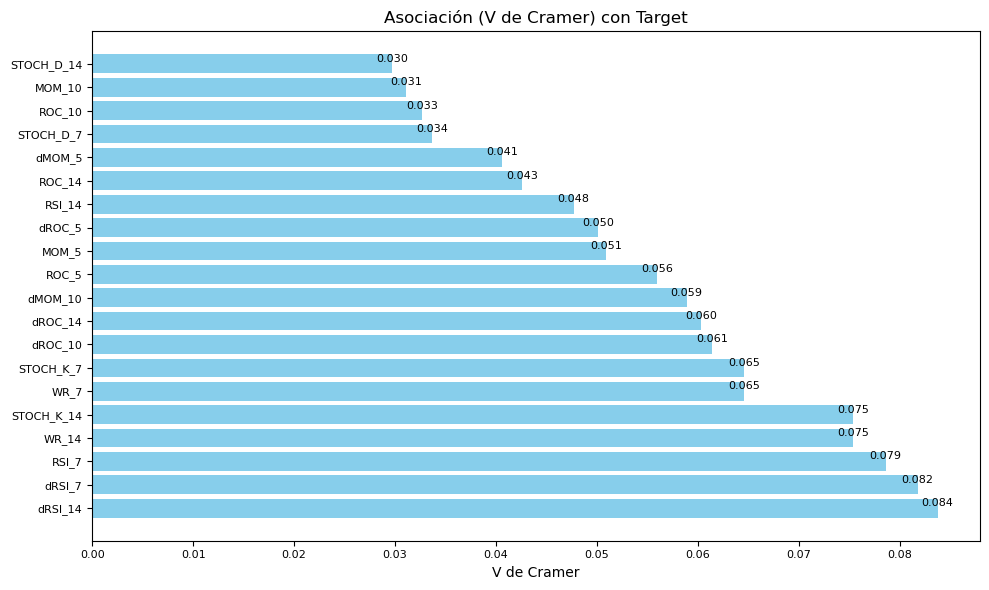

In [25]:
target = df_ta_momentum['Target'] # Variable objetivo
inputs = df_ta_momentum.drop(['Target'], axis = 1) # Variables descriptivas

# --- V de Cramer
graficoVcramer(inputs, target)

#### ➡️ Indicadores técnicos volatilidad

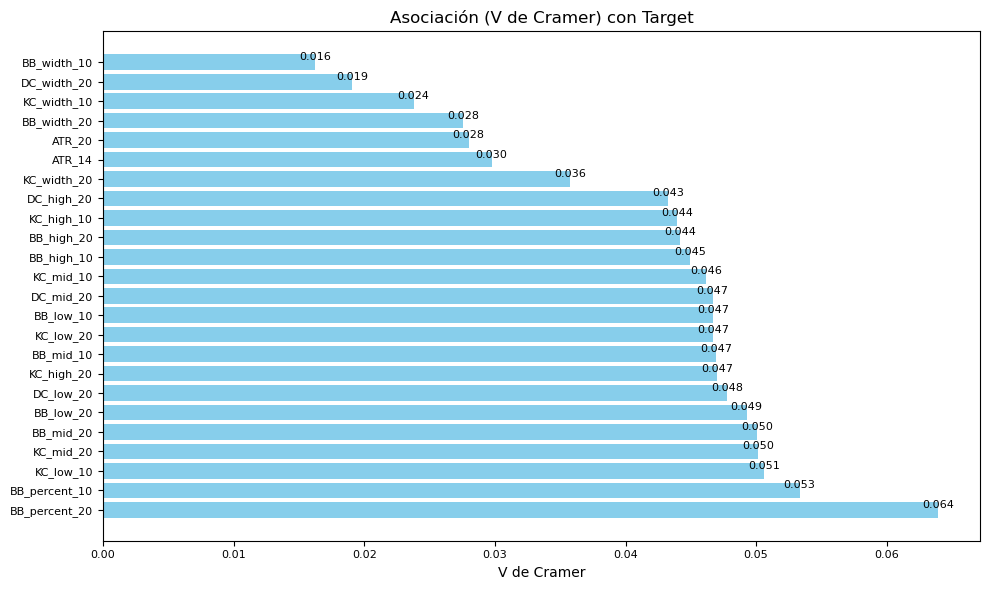

In [26]:
target = df_ta_volatilidad['Target'] # Variable objetivo
inputs = df_ta_volatilidad.drop(['Target'], axis = 1) # Variables descriptivas

# --- V de Cramer
graficoVcramer(inputs, target)

#### ➡️ Indicadores técnicos volumen

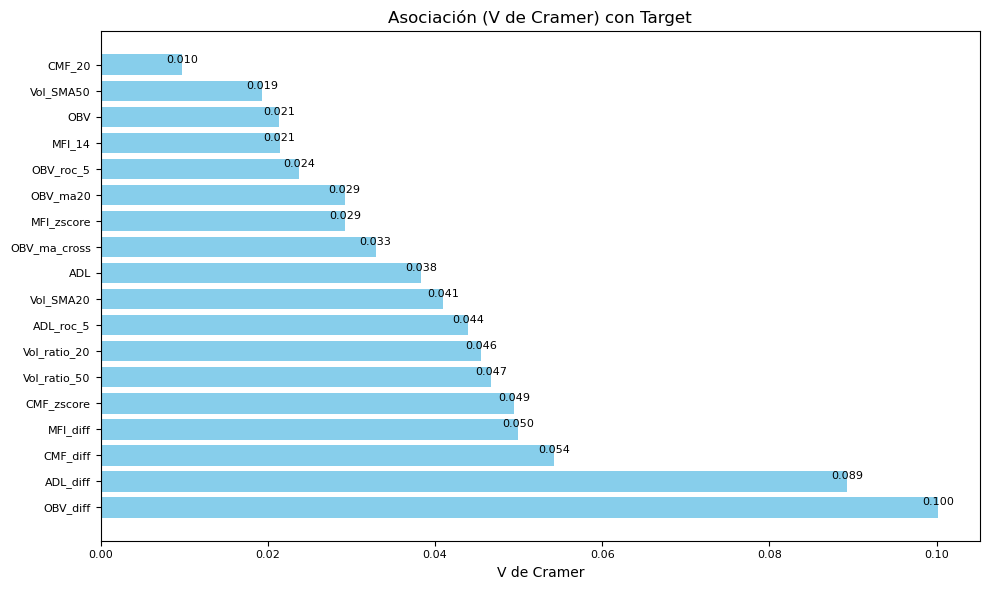

In [27]:
target = df_ta_volumen['Target'] # Variable objetivo
inputs = df_ta_volumen.drop(['Target'], axis = 1) # Variables descriptivas

# --- V de Cramer
graficoVcramer(inputs, target)

#### ➡️ Variables *blockchain*

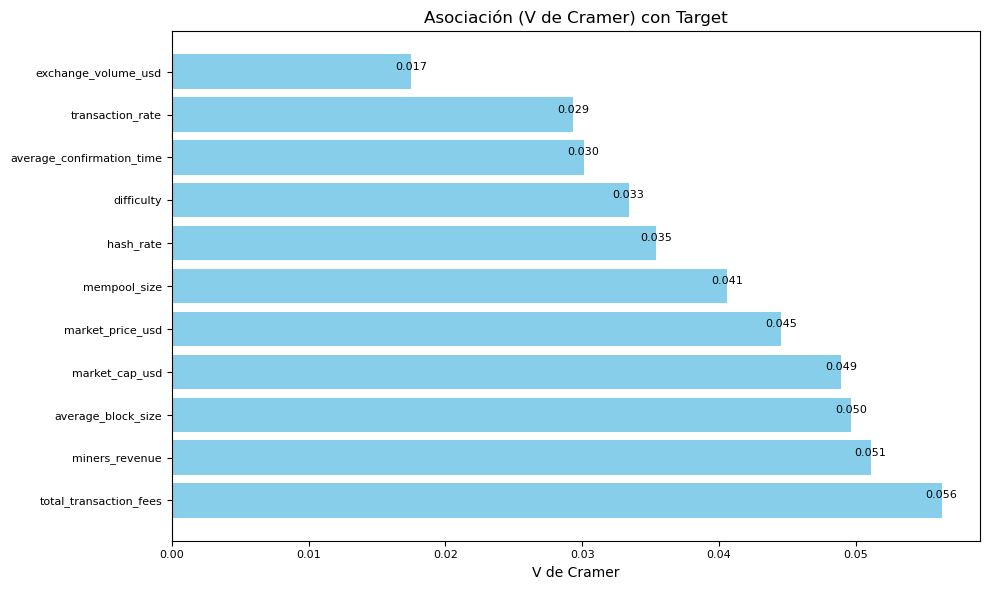

In [28]:
target = df_blockchain['Target'] # Variable objetivo
inputs = df_blockchain.drop(['Target'], axis = 1) # Variables descriptivas

# --- V de Cramer
graficoVcramer(inputs, target)

##### 🔎 Interpretación:

Las diez variables que muestran una mayor relación con la variable objetivo, según su V de Crammer son las siguientes:
1. `OBV_diff`: 0.1
2. `ADL_diff`: 0.089
3. `dRSI_14`: 0.084
4. `dRSI_7`: 0.082
5. `RSI_7`: 0.079
6. `WR_14`: 0.075
7. `STOCH_K_14`: 0.075
8. `WR_7`: 0.065
9. `STOCH_K_7`: 0.065
10. `BB_percent_20`: 0.064

### 📈 Relaciones entre variables explicativas cuantitativas
El coeficiente de correlación de Pearson mide la fuerza y dirección de la relación lineal entre dos variables numéricas. Su valor oscila entre -1 y 1, donde un coeficiente cercano a 1 indica una fuerte relación positiva, mientras que un valor próximo a -1 señala una fuerte relación negativa. Aunque en el caso de las **redes neuronales** la presencia de multicolinealidad no resulta tan crítica como en otros algoritmos (p. ej., regresión lineal o logística), el análisis y posible reducción de variables altamente correlacionadas puede aportar ventajas relevantes:  

- **Eficiencia computacional**  
   - Un conjunto con **98 variables altamente correlacionadas** puede ralentizar el proceso de entrenamiento.  
   - Un mayor número de parámetros implica **mayor consumo de memoria y tiempo de cómputo**.  
- **Reducción del riesgo de sobreajuste (Overfitting)**  
   - La inclusión de características redundantes incrementa el riesgo de sobreajuste.  
   - Este problema es particularmente relevante en datasets de tamaño reducido.  

> ⚠️ **Nota**: En caso de identificar variables **con una correlación muy alta (>=0.9), se seleccionará aquella que tenga el mayor valor de V de Cramer**, ya que es la que aporta más información predictiva sobre la variable objetivo. Las demás serán descartadas o transformadas en una nueva variable para mantener su información.

#### ➡️ VARIABLES DE MERCADO

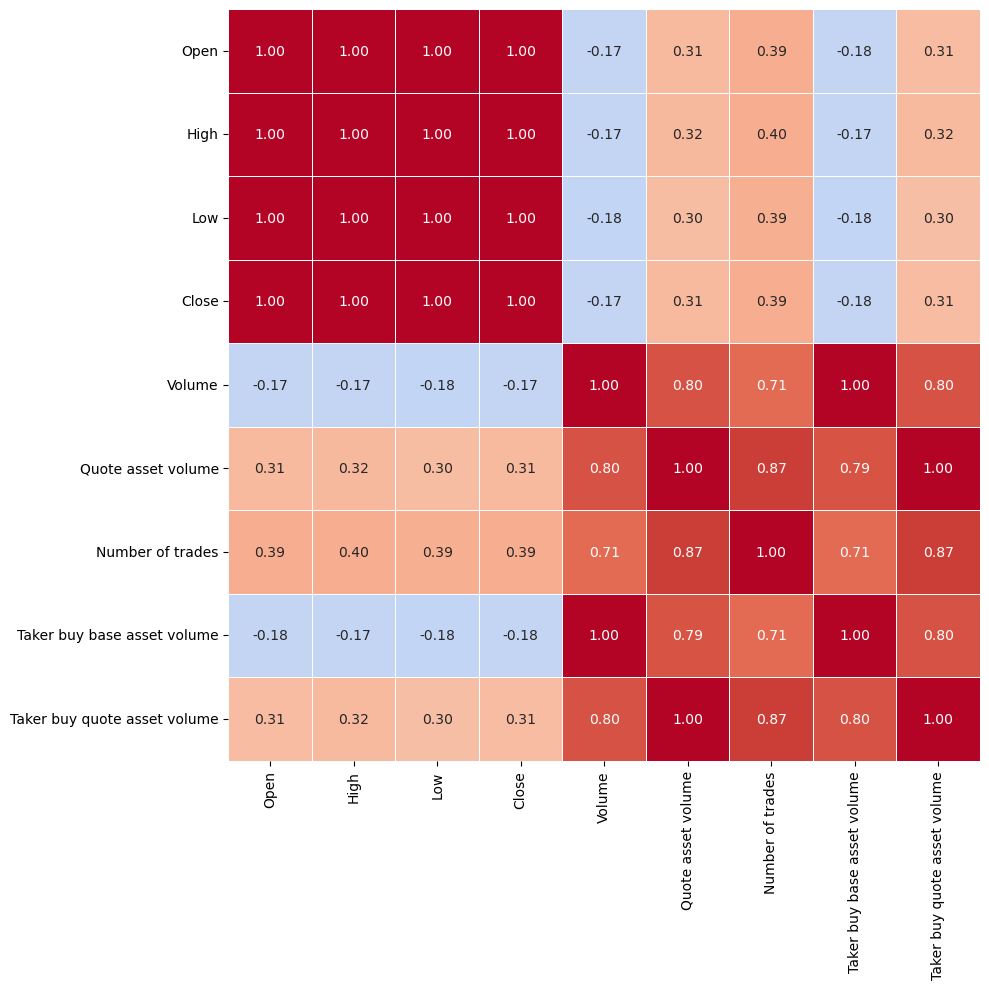

In [29]:
# -- Matriz de correlación
dibujar_matriz_corr(df_mercado)

##### 🔎 **INTERPRETACIÓN**
Tenemos varias variables de mercado altamente correlacionadas:
- `Open` ↔ `High` ↔ `Low` ↔ `Close` (1) → **Nos quedamos con `Close`**.
- `Volume` ↔ `Taker buy base asset volume` (1) → **Nos quedamos con `Taker buy base asset volume`**.
- `Quote asset volume` ↔ `Taker buy quote asset` (1) → **Nos quedamos con `Taker buy quote asset`**.


> ✅ **PASOS A SEGUIR**
> - Descartamos las variables → `Open`, `High`, `Low`, `Volume`, `Quote asset volume`.
> - Para no perder la información aportada por las variables `Open`, `High`, `Low`, creamos dos nuevas variables:
>   - `Range`: `High` - `Low`
>   - `Candle`: `Close` - `Open`

#### ➡️ INDICADORES TÉCNICOS DE TENDENCIA

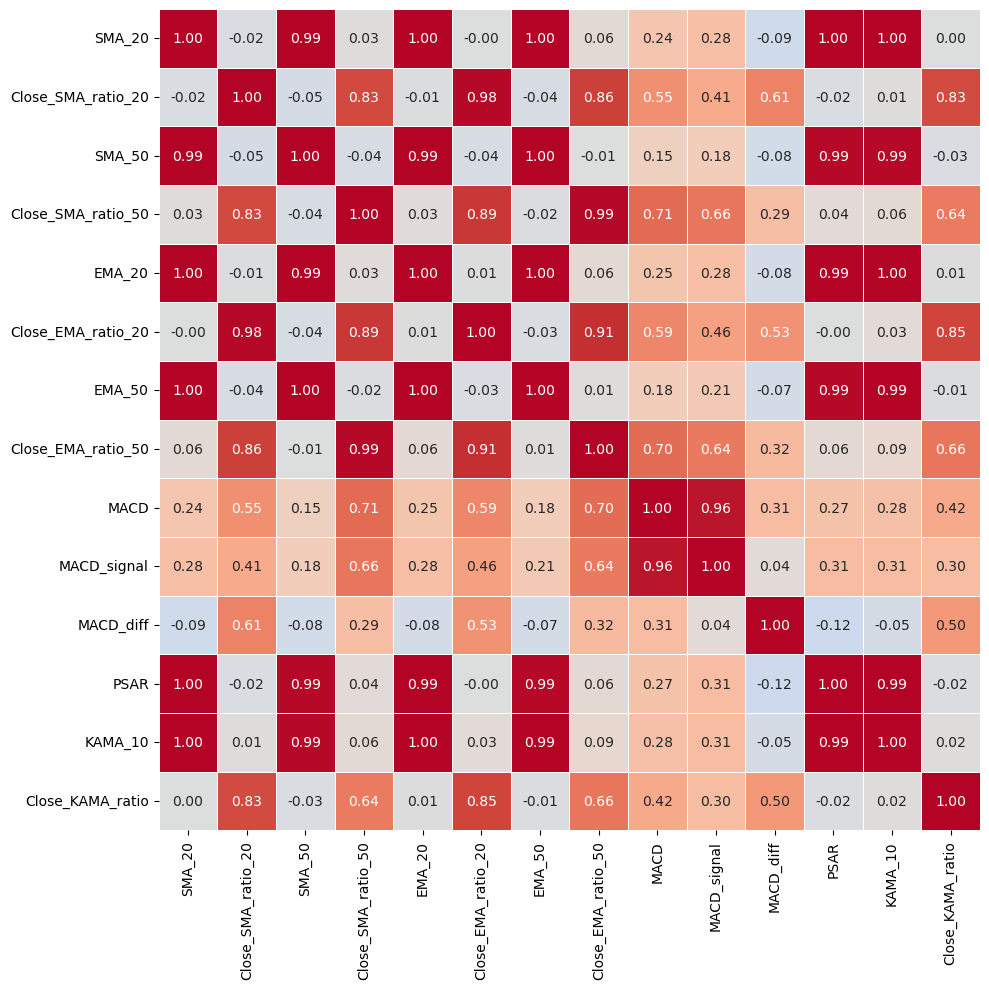

In [30]:
# -- Matriz de correlación
dibujar_matriz_corr(df_ta_tendencia)

##### 🔎 **INTERPRETACIÓN**
Tenemos varios indicadores técnicos de tendencia altamente correlacionados:
- **Medias móviles y suavizadores**:
    - `SMA_20` ↔ `SMA_50` (0.99)
    - `SMA_20` ↔ `EMA_20` (1.00)
    - `SMA_20` ↔ `EMA_50` (1.00)
    - `SMA_20` ↔ `PSAR` (1.00)
    - `SMA_20` ↔ `KAMA_10` (1.00)
    - `SMA_50` ↔ `EMA_20` (0.99)
    - `SMA_50` ↔ `EMA_50` (1.00)
    - `SMA_50` ↔ `PSAR` (0.99)
    - `SMA_50` ↔ `KAMA_10` (0.99)
    - `EMA_20` ↔ `EMA_50` (1.00)
    - `EMA_20` ↔ `PSAR` (0.99)
    - `EMA_20` ↔ `KAMA_10` (1.00)
    - `EMA_50` ↔ `PSAR` (0.99)
    - `EMA_50` ↔ `KAMA_10` (0.99)
    - `PSAR` ↔ `KAMA_10` (0.99)
- **Ratios y MACD**:
    - `Close_SMA_ratio_50` ↔ `Close_EMA_ratio_50` (0.99)
    - `Close_EMA_ratio_20` ↔ `Close_EMA_ratio_50` (0.91)
    - `MACD` ↔ `MACD_signal` (0.96)

> ✅ **PASOS A SEGUIR**
> - ⚠️ Dado el elevado grado de correlación entre los indicadores técnicos de tendencia, se empleará la técnica de **Análisis de Componentes Principales (PCA)** con el objetivo de reducir la dimensionalidad del conjunto de datos y mitigar los efectos de la multicolinealidad.

#### ➡️ INDICADORES TÉCNICOS DE MOMENTUM

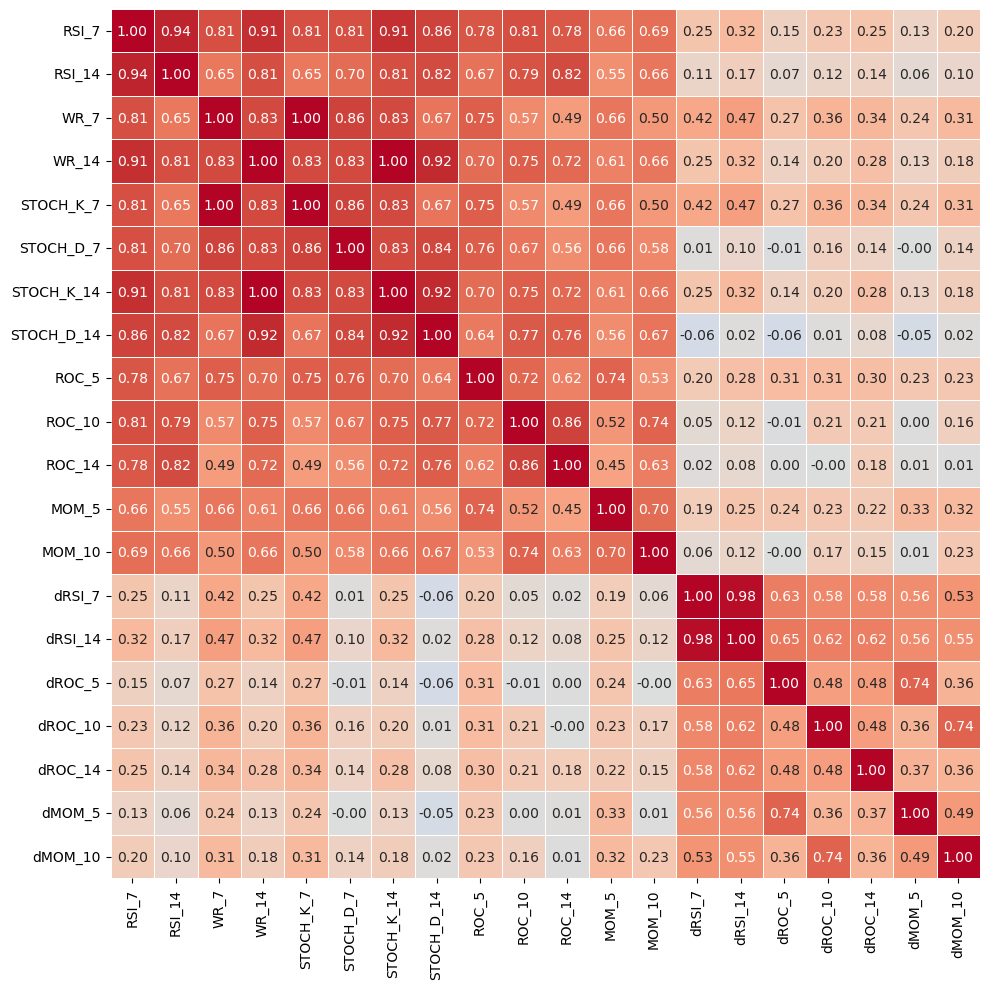

In [31]:
# -- Matriz de correlación
dibujar_matriz_corr(df_ta_momentum)

##### 🔎 **INTERPRETACIÓN**
Tenemos varios indicadores técnicos de *momentum* altamente correlacionados:

- `RSI_7` ↔ `RSI_14` (0.94)
- `RSI_7` ↔ `WR_14` (0.91)
- `RSI_7` ↔ `STOCH_K_14` (0.91)
- `STOCH_K_7` ↔ `WR_7` (1)
- `STOCH_K_14` ↔ `WR_14` (1)
- `STOCH_D_14` ↔ `WR_14` (0.92)
- `STOCH_D_14` ↔ `STOCH_K_14` (0.92)
- `dRSI_14` ↔ `dRSI_7` (0.98)

> ✅ **PASOS A SEGUIR**
> - Debido al alto poder predictivo observado en las variables `dRSI_7` y `dRSI_14` en la gráfica de V de Crammer, se ha decidido crear una nueva variable denominada `diff_dRSI`, definida como la diferencia entre ambas (`dRSI_14` - `dRSI_7`).
> - ⚠️ Dado el elevado grado de correlación entre los indicadores técnicos de *momentum*, se empleará la técnica de **Análisis de Componentes Principales (PCA)** con el objetivo de reducir la dimensionalidad del conjunto de datos y mitigar los efectos de la multicolinealidad.

#### ➡️ INDICADORES TÉCNICOS DE VOLATILIDAD

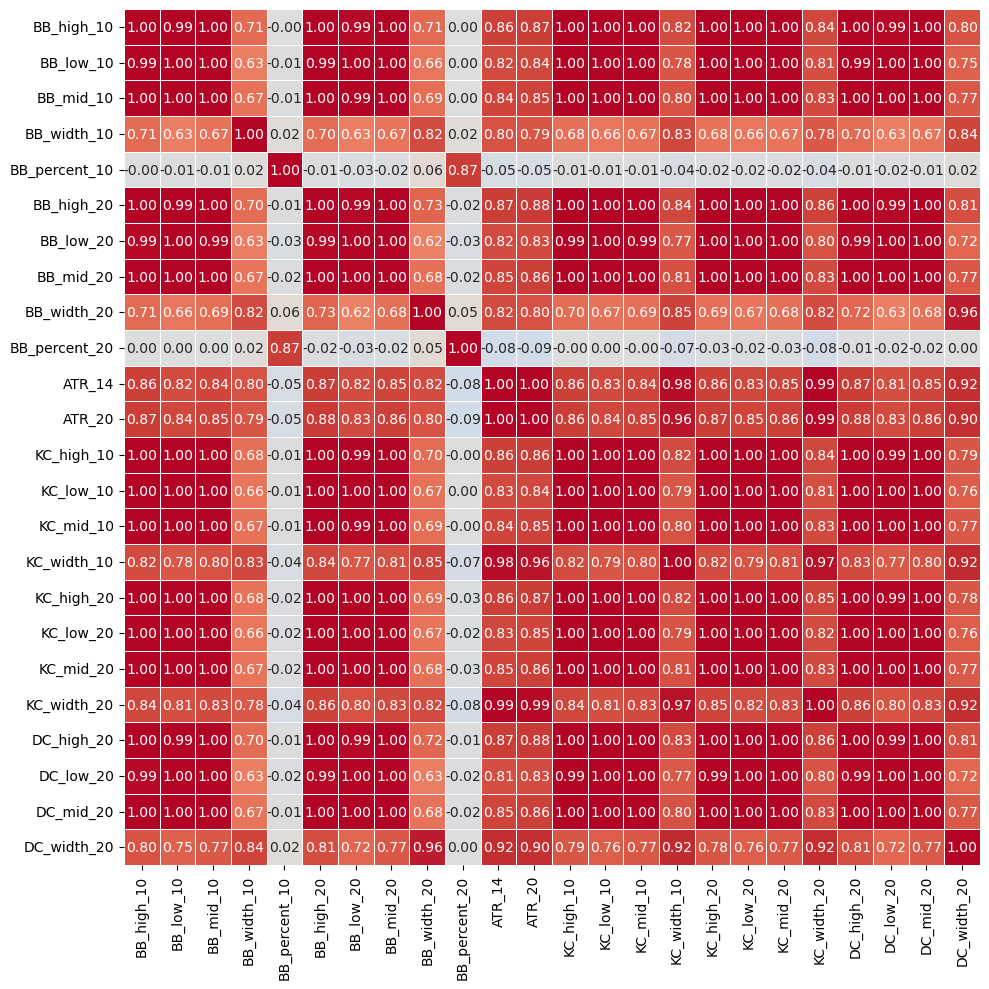

In [32]:
# -- Matriz de correlación
dibujar_matriz_corr(df_ta_volatilidad)

##### 🔎 **INTERPRETACIÓN**
Tenemos varios indicadores técnicos de tendencia altamente correlacionados:

- **Bandas y Canales** (0.99 - 1): `BB_high_10` ↔ `BB_mid_10` ↔ `BB_low_10` ↔ `BB_high_20` ↔ `BB_mid_20` ↔ `BB_low_20` ↔ `KC_high_10` ↔ `KC_mid_10`, `KC_low_10` ↔ `KC_high_20` ↔ `KC_mid_20` ↔ `KC_low_20` ↔ `DC_high_20` ↔ `DC_mid_20` ↔ `DC_low_20`.

- **ATR y Canales**:
    - `ATR_20` ↔ `ATR_14` (1)
    - `ATR_14` ↔ `KC_width_20` (0.99)
    - `ATR_20` ↔ `KC_width_20` (0.99)
    - `ATR_14` ↔ `KC_width_10` (0.98)
    - `ATR_20` ↔ `KC_width_10` (0.96)
    - `ATR_14` ↔ `DC_width_20` (0.92)
    - `ATR_20` ↔ `DC_width_20` (0.9)

> ✅ **PASOS A SEGUIR**
> - Debido al alto poder predictivo observado en las variables `BB_percent_10` y `BB_percent_20` según el análisis con V de Cramér, se ha decidido extender el cálculo de porcentajes a otros indicadores de volatilidad. En concreto, aquellas variables correspondientes con *Keltner Channel* (10 y 20 días) y *Donchian Channel* (20 días).
    - `KC_percent_10` = (`Close` - `KC_low_10`) / (`KC_high_10` - `KC_low_10`)
    - `KC_percent_20` = (`Close` - `KC_low_20`) / (`KC_high_20` - `KC_low_20`)
    - `DC_percent_20` = (`Close` - `DC_low_20`) / (`DC_high_20` - `DC_low_20`)

> - ⚠️ Dado el elevado grado de correlación entre los indicadores técnicos de volatilidad, se empleará la técnica de **Análisis de Componentes Principales (PCA)** con el objetivo de reducir la dimensionalidad del conjunto de datos y mitigar los efectos de la multicolinealidad.

#### ➡️ INDICADORES TÉCNICOS DE VOLUMEN

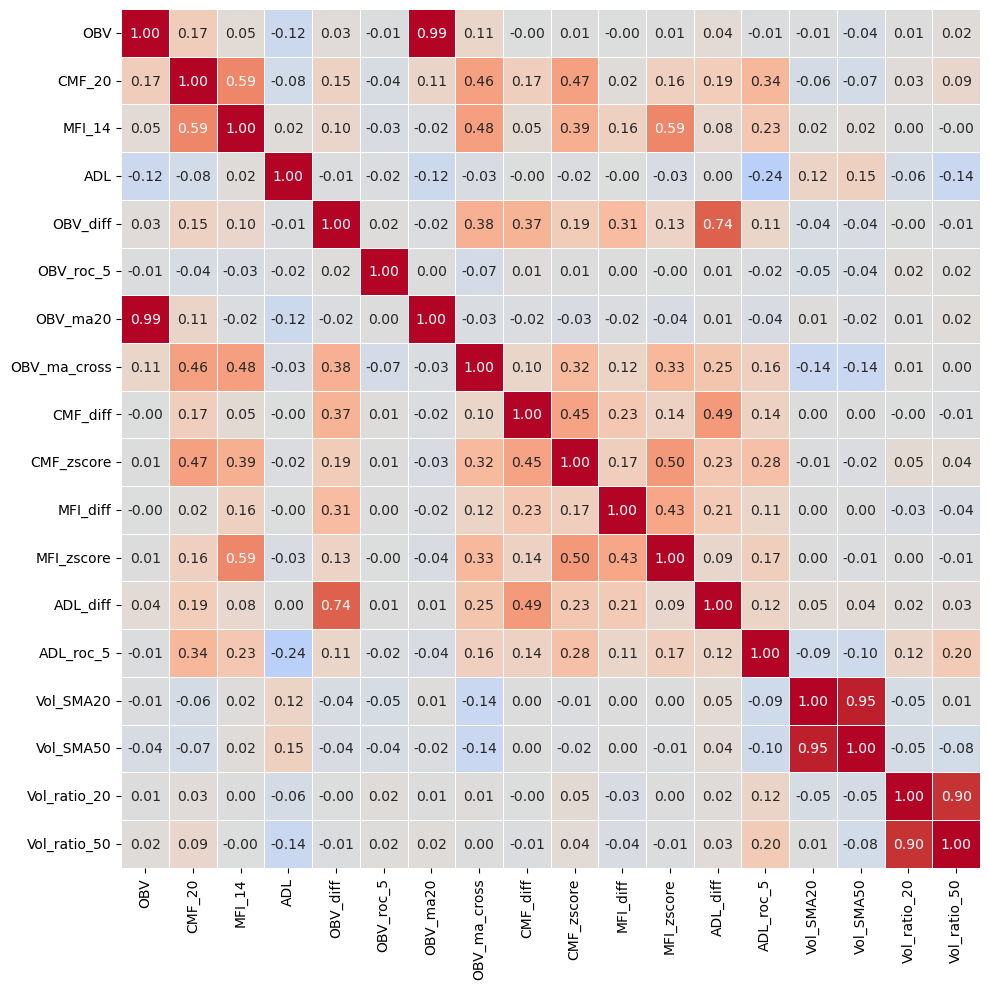

In [33]:
# -- Matriz de correlación
dibujar_matriz_corr(df_ta_volumen)

##### 🔎 Interpretación:
Tenemos varios indicadores técnicos de volumen altamente correlacionados:

- `OBV_ma20` ↔ `OBV` (0.99) → Mantenemos `OBV_ma20`
- `Vol_SMA_50` ↔ `Vol_SMA_20` (0.95) → Mantenemos `Vol_SMA_20` y creamos `diff_Vol_SMA` = `Vol_SMA_20` - `Vol_SMA_50`
- `Vol_ratio_50` ↔ `Vol_ratio_20` (0.90) → Mantenemos `Vol_ratio_50` y creamos `diff_Vol_ratio` = `Vol_ratio_20` - `Vol_ratio_50`

> ⚠️ **Variables descartadas:** `OBV`, `Vol_SMA_50`, `Vol_ratio_20`.

#### ➡️ VARIABLES DE BLOCKCHAIN

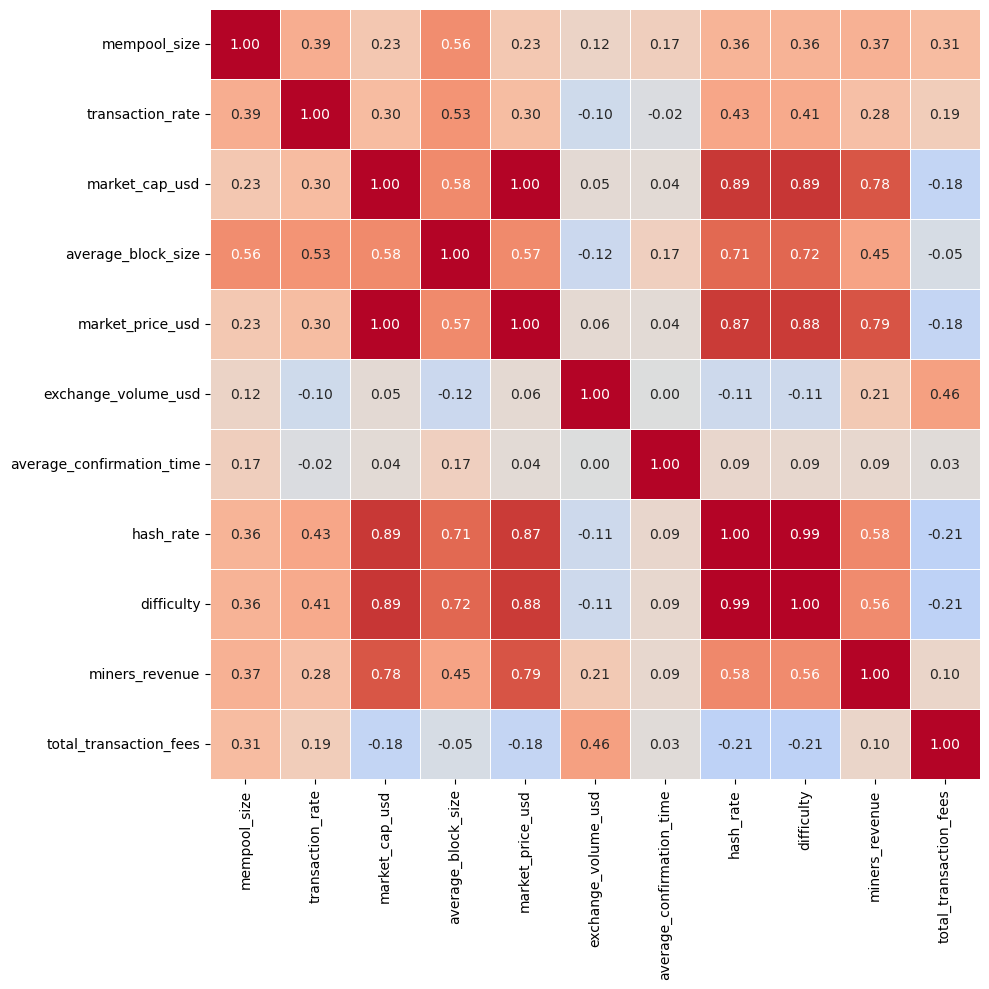

In [34]:
# -- Matriz de correlación
dibujar_matriz_corr(df_blockchain)

##### 🔎 Interpretación:
Tenemos varias variables de la *blockchain* altamente correlacionados:

- `market_price_usd` ↔ `market_cap_usd` (1) → Mantenemos `market_cap_usd`
- `hash_rate` ↔ `difficulty` (0.99) → Mantenemos `hash_rate` y creamos `diff_hash_difficulty` = `hash_rate` - `difficulty`

> ⚠️ **Variables descartadas:** `market_price_usd`, `difficulty`

### 📈 Transformación de Variables y Reducción de Dimensionalidad
En ocasiones, algunas variables cuantitativas pueden no mostrar una relación directa con la variable objetivo. No obstante, mediante transformaciones adecuadas o la creación de nuevas variables, es posible fortalecer dicha relación y mejorar la capacidad predictiva del modelo. Asimismo, cuando el número de variables es elevado y existe una gran multicolinealidad, aplicar técnicas de reducción de dimensionalidad puede resultar beneficioso. En esta sección se desarrollarán las transformaciones y técnicas seleccionadas en el apartado anterior.

#### ➡️ VARIABLES DE MERCADO
##### 📝 Creación de nuevas variables:
 - `Range`: `High` - `Low`
 - `Candle`: `Close` - `Open`

In [35]:
# =============================================================================
# NUEVAS VARIABLES DE MERCADO
# =============================================================================

DROP_COLUMNS = ['Open', 'High', 'Low', 'Volume', 'Quote asset volume']

# Crear la columna 'Range' como la diferencia entre 'High' y 'Low'
df_bitcoin['Range'] = df_bitcoin['High'] - df_bitcoin['Low']

# Crear la columna 'Candle' como la diferencia entre 'Close' y 'Open'
df_bitcoin['Candle'] = df_bitcoin['Close'] - df_bitcoin['Open']

# Descartamos las variables: 'Open', 'High', 'Low', 'Volume', 'Quote asset volume'
df_bitcoin = df_bitcoin.drop(DROP_COLUMNS, axis=1)

# Colocamos columnas
cols = list(df_bitcoin.columns)

# Eliminar 'Range' y 'Candle' de su posición actual
cols.remove('Range')
cols.remove('Candle')

# Encontrar el índice de 'Taker buy quote asset volume'
target_index = cols.index('Taker buy quote asset volume')

# Insertar 'Range' y 'Candle' justo después
cols.insert(target_index + 1, 'Range')
cols.insert(target_index + 2, 'Candle')

# Reordenar el DataFrame
df_bitcoin = df_bitcoin[cols]

# Volvemos a calcular df_mercado para repetir el analisis
df_mercado = df_bitcoin.loc[:, 'Close':'Candle'].join(df_bitcoin['Target'])

#### ➡️ INDICADORES TÉCNICOS DE TENDENCIA
##### 📝 Análisis de Componentes Principales (PCA):

In [36]:
# =============================================================================
# ANÁLISIS PCA - INDICADORES TÉCNICOS DE TENDENCIA
# =============================================================================

# -------------------------------- Estandarizamos los datos
df_ta_tendencia = df_ta_tendencia.drop(['Target'], axis = 1) # Variables descriptivas
numericas = list(df_ta_tendencia.select_dtypes(include=['int', 'int32', 'int64','float', 'float32', 'float64']).columns)

df_ta_tendencia_std = pd.DataFrame(
    StandardScaler().fit_transform(df_ta_tendencia),  # Datos estandarizados
    columns=['{}_z'.format(variable) for variable in numericas],  # Nombres de columnas estandarizadas
    index=df_ta_tendencia.index  # Índices (etiquetas de filas) del DataFrame
)

df_ta_tendencia_std

,SMA_20_z,Close_SMA_ratio_20_z,SMA_50_z,Close_SMA_ratio_50_z,EMA_20_z,Close_EMA_ratio_20_z,EMA_50_z,Close_EMA_ratio_50_z,MACD_z,MACD_signal_z,MACD_diff_z,PSAR_z,KAMA_10_z,Close_KAMA_ratio_z
0,-1.007141,0.608404,-1.006600,-0.019382,-1.004450,0.346677,-1.011115,0.058763,-0.148235,-0.195125,0.136645,-1.008203,-1.002992,0.235257
1,-1.006003,0.717614,-1.006540,0.089401,-1.003666,0.505250,-1.010797,0.173600,-0.141264,-0.185665,0.129232,-1.004993,-1.002236,0.460991
2,-1.004746,0.756498,-1.006316,0.158186,-1.002777,0.585774,-1.010415,0.246357,-0.133354,-0.176435,0.126041,-1.002169,-1.001745,0.624079
3,-1.003693,1.232661,-1.005959,0.457015,-1.001252,1.086423,-1.009745,0.579951,-0.115622,-0.165325,0.152134,-0.999683,-0.999585,1.244824
4,-1.002168,1.481888,-1.005459,0.646613,-0.999386,1.341556,-1.008894,0.782879,-0.094339,-0.151965,0.183361,-0.996664,-0.996402,1.437316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2872,2.921642,-0.100255,2.960450,-0.106649,2.945433,-0.145073,2.953562,-0.044769,0.467624,0.490086,0.004232,3.162921,2.926278,-0.110662
2873,2.920498,-0.095045,2.967663,-0.116143,2.945117,-0.141552,2.957074,-0.049438,0.384606,0.473004,-0.239126,3.157619,2.926176,-0.106577
2874,2.917500,-0.194280,2.973279,-0.186075,2.940923,-0.253192,2.958794,-0.124912,0.246657,0.430351,-0.594003,3.152423,2.925752,-0.281100
2875,2.908860,-0.477382,2.977365,-0.367230,2.925999,-0.563587,2.955739,-0.326069,-0.055280,0.332784,-1.356128,3.139248,2.919930,-0.759065


In [37]:
# -------------------------------- Analisis PCA Inicial:
# Creamos la instancia de PCA a través de la librería scikit-learn partiendo del número máximo de componentes principales (14), 
# el cual coincide con el número de variables numéricas de nuestro conjunto de datos:

pca = PCA(n_components=14)

# Aplicar el Análisis de Componentes Principales (ACP) a los datos estandarizados:
fit = pca.fit(df_ta_tendencia_std)

Teniendo en cuenta nuestro objetivo de reducir la dimensionalidad, debemos determinar cuántas componentes principales conservar. Para ello, calculamos la varianza explicada y la varianza explicada acumulada, lo que nos permite evaluar cuánto porcentaje de la variabilidad total explica con cada componente:

In [38]:
# -------------------------------- Determinar Número de Componentes:
# Obtener los autovalores asociados a cada componente principal.
autovalores = fit.explained_variance_

# Obtener la varianza explicada por cada componente principal como un porcentaje de la varianza total.
var_explicada = fit.explained_variance_ratio_*100

# Calcular la varianza explicada acumulada a medida que se agregan cada componente principal.
var_acumulada = np.cumsum(var_explicada)

# Crear un DataFrame de pandas con los datos anteriores y establecer índice.
data = {'Autovalores': autovalores, 'Variabilidad Explicada': var_explicada, 'Variabilidad Acumulada': var_acumulada}
tabla = pd.DataFrame(data, index=['Componente {}'.format(i) for i in range(1, fit.n_components_+1)]) 

# Imprimir la tabla
print(tabla)

                Autovalores  Variabilidad Explicada  Variabilidad Acumulada
Componente 1   6.276753e+00            4.481837e+01               44.818369
Componente 2   5.359731e+00            3.827049e+01               83.088858
Componente 3   1.296479e+00            9.257346e+00               92.346204
Componente 4   6.643266e-01            4.743540e+00               97.089744
Componente 5   3.100491e-01            2.213866e+00               99.303611
Componente 6   7.361693e-02            5.256524e-01               99.829263
Componente 7   1.249071e-02            8.918831e-02               99.918452
Componente 8   6.120619e-03            4.370351e-02               99.962155
Componente 9   4.700827e-03            3.356566e-02               99.995721
Componente 10  2.848325e-04            2.033811e-03               99.997755
Componente 11  1.560017e-04            1.113911e-03               99.998869
Componente 12  1.399562e-04            9.993400e-04               99.999868
Componente 1

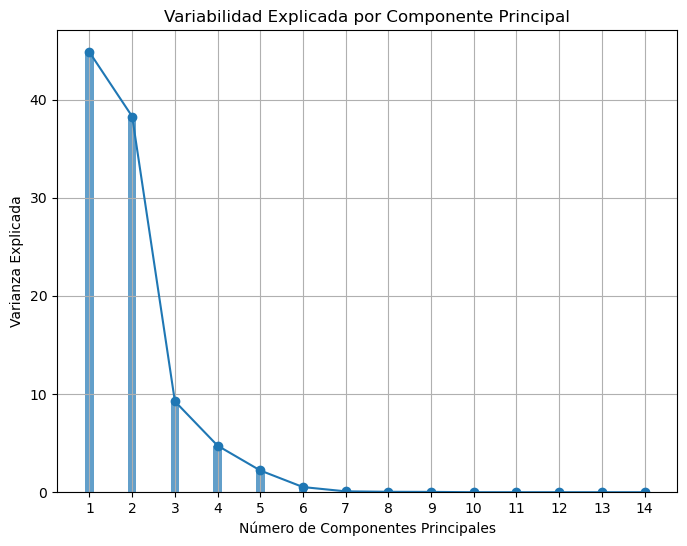

In [39]:
# -------------------------------- Gráfico del codo:
plot_varianza_explicada(var_explicada, fit.n_components_)

<p>Observamos, que la variabilidad explicada por cada componente disminuye progresivamente y se estabiliza a partir de la tercera. Por ello, <b>decidimos conservar únicamente tres de las catorce componentes principales</b>, dado que juntas explican el <b>~92.35%</b> de la varianza de las variables originales.</p>

- **Componente 1**: explica 44.81% de la variabilidad.
- **Componente 2**: explica 38.27% de la variabilidad.
- **Componente 3**: explica 9.25% de la variabilidad.

Analizamos **la relación que existe entre las variables originales y las componentes seleccionadas** a través de la matriz de correlación:

In [40]:
# -------------------------------- Relación entre variables y componentes:

# Crea una instancia de ACP con las tres primeras componentes que nos interesan y aplicar a los datos.
pca = PCA(n_components=3)
fit = pca.fit(df_ta_tendencia_std)

# Calculamos las tres primeras componentes principales
resultados_pca = pd.DataFrame(fit.transform(df_ta_tendencia_std), 
                              columns=['Componente {}'.format(i) for i in range(1, fit.n_components_+1)],
                              index=df_ta_tendencia_std.index)

# Añadimos las componentes principales a la base de datos estandarizada.
df_ta_tendencia_z_cp = pd.concat([df_ta_tendencia_std, resultados_pca], axis=1)

# Calculo la matriz de correlaciones entre veriables y componentes
Correlaciones_var_comp = df_ta_tendencia_z_cp.corr()
Correlaciones_var_comp = Correlaciones_var_comp.iloc[:fit.n_features_in_, fit.n_features_in_:]
Correlaciones_var_comp

,Componente 1,Componente 2,Componente 3
SMA_20_z,0.921238,-0.384035,-0.053564
Close_SMA_ratio_20_z,0.326470,0.879699,-0.273980
SMA_50_z,0.889475,-0.435265,-0.133773
Close_SMA_ratio_50_z,0.386977,0.849371,0.173856
EMA_20_z,0.924590,-0.374985,-0.064341
Close_EMA_ratio_20_z,0.356955,0.894058,-0.199742
EMA_50_z,0.900146,-0.418386,-0.117218
Close_EMA_ratio_50_z,0.414851,0.846637,0.127034
MACD_z,0.546898,0.600770,0.449154
MACD_signal_z,0.546660,0.479294,0.640550


##### 🔎 **INTERPRETACIÓN**

**Componente 1:**
- Relación directa (>0.80):
   - `KAMA_10_z` (0.935): Adaptive Moving Average de corto plazo
   - `EMA_20_z` (0.925): Exponential Moving Average corto plazo
   - `PSAR_z` (0.923): Parabolic SAR
   - `SMA_20_z` (0.921): Simple Moving Average corto plazo
   - `EMA_50_z` (0.900): Exponential Moving Average medio plazo
   - `SMA_50_z` (0.889): Simple Moving Average medio plazo
- Relación moderada (0.40-0.80):
   - `MACD_z` (0.547) y `MACD_signal_z` (0.547): Indicadores MACD
   - `Close_SMA_ratio_50_z` (0.387): Ratio precio/SMA50
   - `Close_EMA_ratio_20_z` (0.357): Ratio precio/EMA20
   - `Close_SMA_ratio_20_z` (0.326): Ratio precio/SMA20
   - `Close_KAMA_ratio_z` (0.285): Ratio precio/KAMA

**Componente 2:**
- Relación directa (>0.80):
   - `Close_EMA_ratio_20_z` (0.894): Ratio precio/EMA20
   - `Close_SMA_ratio_20_z` (0.880): Ratio precio/SMA20
   - `Close_SMA_ratio_50_z` (0.849): Ratio precio/SMA50
   - `Close_KAMA_ratio_z` (0.748): Ratio precio/KAMA
- Relación moderada (0.40-0.80):
   - `MACD_z` (0.601): MACD principal
   - `MACD_diff_z` (0.527): Diferencial MACD
   - `MACD_signal_z` (0.479): Señal MACD
   - `Close_EMA_ratio_50_z` (0.847): Ratio precio/EMA50

**Componente 3:**
- Relación directa (>0.80):
   - Ninguna variable supera 0.80
- Relación moderada (0.40-0.80):
   - `MACD_signal_z` (0.641): Señal MACD
   - `MACD_z` (0.449): MACD principal
- Relación débil (0.10-0.40):
   - `Close_SMA_ratio_50_z` (0.174): Ratio precio/SMA50
   - `Close_EMA_ratio_50_z` (0.127): Ratio precio/EMA50

<br>

> 🧠 **RESUMEN:** Los 3 componentes explican el 92.35% de la variabilidad total, transformando 14 indicadores de tendencia en 3 componentes:
> - **PC1**: Consenso direccional de tendencia (factor dominante)
> - **PC2**: Posición relativa del precio vs medias móviles (factor de divergencia)
> - **PC3**: Señales MACD específicas (factor de confirmación)

Finalmente, incluimos **estos tres componentes principales en nuestro conjunto de datos principal** (`df_bitcoin`) y descartamos las variables originales:

In [41]:
# =============================================================================
# INCLUIMOS RESULTADOS PCA TA TENDENCIA EN DF_BITCOIN
# =============================================================================

# Renombrar las columnas de resultados_pca
resultados_pca.columns = ['c{}_ta_tendencia'.format(i) for i in range(1, resultados_pca.shape[1] + 1)]

# Descartamos columnas ta tendencia originales
df_bitcoin = df_bitcoin.drop(list(df_ta_tendencia.columns), axis = 1)

# Añadir las columnas al DataFrame df_bitcoin
df_bitcoin = df_bitcoin.join(resultados_pca)

#### ➡️ INDICADORES TÉCNICOS DE MOMENTUM
##### 📝 Creación de nuevas variables:
 - `diff_RSI`: `dRSI_14` - `dRSI_7`

In [42]:
# =============================================================================
# NUEVAS VARIABLES - INDICADORES TÉCNICOS DE MOMENTUM
# =============================================================================

# Crear la columna 'diff_dRSI' como la diferencia entre 'dRSI_14' y 'dRSI_7'
df_bitcoin['diff_dRSI'] = df_bitcoin['dRSI_14'] - df_bitcoin['dRSI_7']

# Colocamos columnas
cols = list(df_bitcoin.columns)

# Eliminar 'diff_dRSI' de su posición actual
cols.remove('diff_dRSI')

# Encontrar el índice de 'dRSI_14'
target_index = cols.index('dRSI_14')

# Insertar 'diff_dRSI'
cols.insert(target_index + 1, 'diff_dRSI')

# Reordenar el DataFrame
df_bitcoin = df_bitcoin[cols]

# Volvemos a calcular df_ta_momentum para repetir el analisis
df_ta_momentum = df_bitcoin.loc[:, 'RSI_7':'dMOM_10'].join(df_bitcoin['Target'])

Una vez creada la nueva variable, volvemos a representar la **V de Crammer** de todos los indicadores de *momentum*:
> Verificamos que la nueva variable `diff_dRSI` se posiciona **entre las cuatro más relevantes** según el análisis.

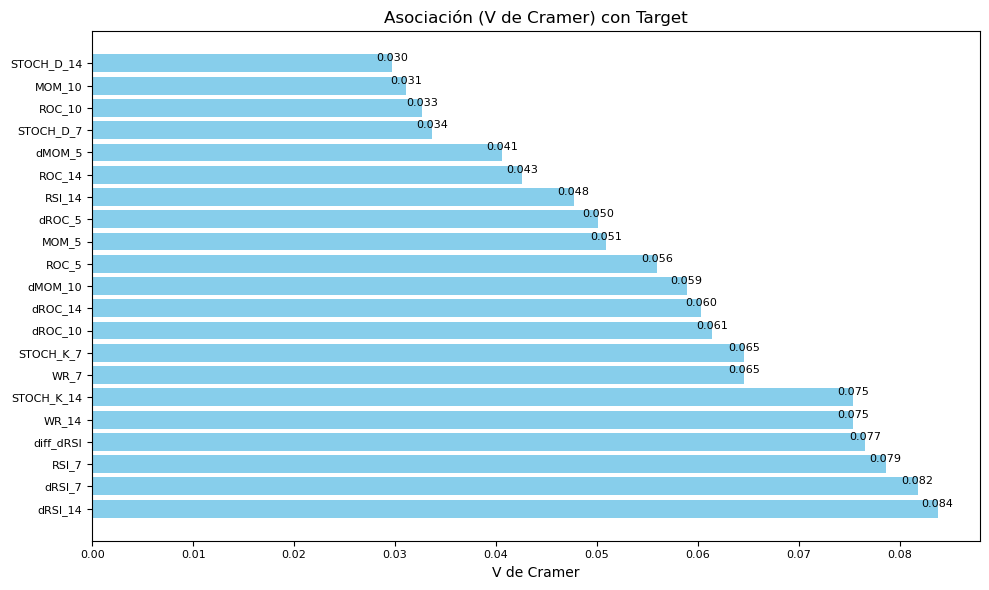

In [43]:
# --- V de Cramer
target = df_ta_momentum['Target'] # Variable objetivo
inputs = df_ta_momentum.drop(['Target'], axis = 1) # Variables descriptivas

graficoVcramer(inputs, target)

##### 📝 Análisis de Componentes Principales (PCA):

In [44]:
# =============================================================================
# ANÁLISIS PCA - INDICADORES TÉCNICOS DE TENDENCIA
# =============================================================================

# -------------------------------- Estandarizamos los datos
df_ta_momentum = df_ta_momentum.drop(['Target'], axis = 1) # Variables descriptivas
numericas = list(df_ta_momentum.select_dtypes(include=['int', 'int32', 'int64','float', 'float32', 'float64']).columns)

df_ta_momentum_std = pd.DataFrame(
    StandardScaler().fit_transform(df_ta_momentum),  # Datos estandarizados
    columns=['{}_z'.format(variable) for variable in numericas],  # Nombres de columnas estandarizadas
    index=df_ta_momentum.index  # Índices (etiquetas de filas) del DataFrame
)

df_ta_momentum_std

,RSI_7_z,RSI_14_z,WR_7_z,WR_14_z,STOCH_K_7_z,STOCH_D_7_z,STOCH_K_14_z,STOCH_D_14_z,ROC_5_z,ROC_10_z,...,MOM_5_z,MOM_10_z,dRSI_7_z,dRSI_14_z,diff_dRSI_z,dROC_5_z,dROC_10_z,dROC_14_z,dMOM_5_z,dMOM_10_z
0,0.384250,0.182669,0.047358,0.691130,0.047358,-0.029255,0.691130,0.659215,-0.354145,0.640216,...,-0.104853,-0.006035,0.621596,0.487252,-0.734869,-0.551253,-1.077986,2.059918,-0.068056,-0.101936
1,0.637707,0.330687,0.100934,0.922293,0.100934,-0.111788,0.922293,0.720736,-0.137997,0.896756,...,-0.076118,0.024867,0.515771,0.435109,-0.576959,0.347538,0.599920,0.486990,0.044462,0.068115
2,0.806557,0.434364,0.526157,1.067822,0.526157,0.255147,1.067822,0.954217,0.010049,0.304795,...,-0.056431,-0.044115,0.343813,0.304960,-0.368721,0.238113,-1.379976,-0.840661,0.030656,-0.148408
3,1.322412,0.812985,1.500983,1.523488,1.500983,0.806222,1.523488,1.250680,0.834741,0.780549,...,0.051231,0.019182,1.049079,1.111960,-0.931928,1.325336,1.111433,1.830038,0.164890,0.138342
4,1.559232,1.033674,1.148027,1.238459,1.148027,1.203180,1.238459,1.363290,1.586646,1.075704,...,0.144398,0.058628,0.481958,0.648408,-0.281688,1.208383,0.690022,-0.876753,0.142773,0.086638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2872,-0.320588,-0.130321,-1.530247,-0.398116,-1.530247,-1.499467,-0.398116,-0.338889,-0.247132,0.018595,...,-0.562233,0.536011,0.021068,0.020491,-0.020674,0.106730,-0.143217,0.136566,0.370728,-0.478921
2873,-0.313234,-0.125746,-1.659884,-0.513407,-1.659884,-1.772846,-0.513407,-0.471074,-0.391917,-0.160602,...,-1.096315,-0.123942,0.015580,0.014084,-0.016426,-0.232402,-0.416831,-0.279885,-0.814292,-1.429499
2874,-0.637477,-0.358664,-1.364663,-0.863321,-1.364663,-1.727282,-0.863321,-0.632920,-0.820592,-0.188033,...,-2.728243,-0.226263,-0.658371,-0.682990,0.600651,-0.688550,-0.062700,-0.332922,-2.489399,-0.220680
2875,-1.305050,-0.919710,-1.896046,-1.883898,-1.896046,-1.865958,-1.883898,-1.162114,-0.677555,-0.414607,...,-2.106568,-1.070659,-1.356172,-1.646091,0.982617,0.230066,-0.527380,-0.396617,0.949178,-1.829329


In [45]:
# -------------------------------- Analisis PCA Inicial:
# Creamos la instancia de PCA a través de la librería scikit-learn partiendo del número máximo de componentes principales (21), 
# el cual coincide con el número de variables numéricas de nuestro conjunto de datos:

pca = PCA(n_components=21)

# Aplicar el Análisis de Componentes Principales (ACP) a los datos estandarizados:
fit = pca.fit(df_ta_momentum_std)

In [46]:
# -------------------------------- Determinar Número de Componentes:
# Obtener los autovalores asociados a cada componente principal.
autovalores = fit.explained_variance_

# Obtener la varianza explicada por cada componente principal como un porcentaje de la varianza total.
var_explicada = fit.explained_variance_ratio_*100

# Calcular la varianza explicada acumulada a medida que se agregan cada componente principal.
var_acumulada = np.cumsum(var_explicada)

# Crear un DataFrame de pandas con los datos anteriores y establecer índice.
data = {'Autovalores': autovalores, 'Variabilidad Explicada': var_explicada, 'Variabilidad Acumulada': var_acumulada}
tabla = pd.DataFrame(data, index=['Componente {}'.format(i) for i in range(1, fit.n_components_+1)]) 

# Imprimir la tabla
print(tabla)

                Autovalores  Variabilidad Explicada  Variabilidad Acumulada
Componente 1   1.032083e+01            4.912973e+01               49.129726
Componente 2   4.887078e+00            2.326371e+01               72.393437
Componente 3   1.069059e+00            5.088988e+00               77.482425
Componente 4   9.815912e-01            4.672619e+00               82.155044
Componente 5   9.444349e-01            4.495746e+00               86.650790
Componente 6   6.435531e-01            3.063473e+00               89.714264
Componente 7   5.408278e-01            2.574475e+00               92.288739
Componente 8   4.393033e-01            2.091194e+00               94.379933
Componente 9   3.178176e-01            1.512891e+00               95.892824
Componente 10  2.092238e-01            9.959577e-01               96.888781
Componente 11  1.693221e-01            8.060153e-01               97.694797
Componente 12  1.495507e-01            7.118989e-01               98.406696
Componente 1

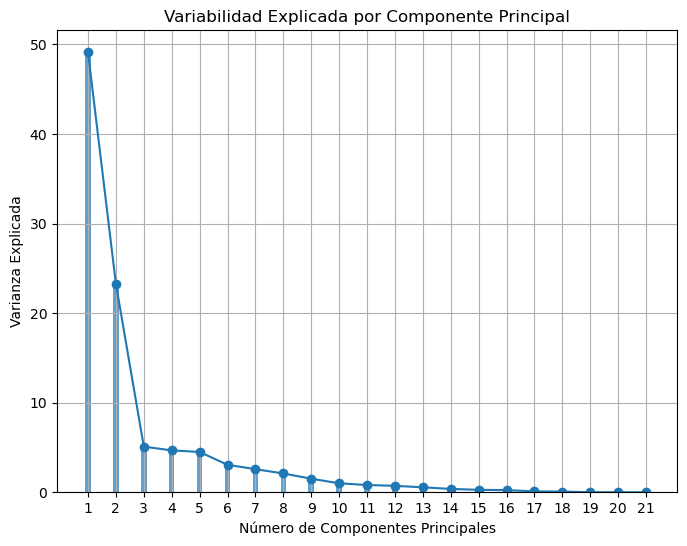

In [47]:
# -------------------------------- Gráfico del codo:
plot_varianza_explicada(var_explicada, fit.n_components_)

Se observa que la variabilidad explicada por cada componente principal disminuye de forma progresiva y tiende a estabilizarse a partir de la tercera. No obstante, si se consideran únicamente los tres primeros componentes, la variabilidad explicada asciende al 77.48%, lo cual puede resultar insuficiente en términos de representatividad. Asimismo, en el gráfico se aprecia un cambio en la pendiente alrededor del quinto componente, lo que sugiere que la incorporación hasta dicho componente aporta una ganancia marginal. 

Por este motivo, y dado que en el entrenamiento de redes neuronales la dimensionalidad no constituye una restricción crítica (en comparación con métodos lineales), se opta por conservar **cinco de los veintiún componentes principales**, que en conjunto explican aproximadamente el 92.28% de la varianza total. Esta elección garantiza un balance adecuado entre reducción de dimensionalidad y retención de información.


- **Componente 1**: explica 49.13% de la variabilidad.
- **Componente 2**: explica 23.26% de la variabilidad.
- **Componente 3**: explica 5.08% de la variabilidad.
- **Componente 4**: explica 4.67% de la variabilidad.
- **Componente 5**: explica 4.49% de la variabilidad.

Estudiamos **la relación que existe entre las variables originales y las componentes seleccionadas** a través de la matriz de correlación:

In [48]:
# -------------------------------- Relación entre variables y componentes:
# Crea una instancia de ACP con las cinco primeras componentes que nos interesan y aplicar a los datos.
pca = PCA(n_components=5)
fit = pca.fit(df_ta_momentum_std)

# Calculamos las tres primeras componentes principales
resultados_pca = pd.DataFrame(fit.transform(df_ta_momentum_std), 
                              columns=['Componente {}'.format(i) for i in range(1, fit.n_components_+1)],
                              index=df_ta_momentum_std.index)

# Añadimos las componentes principales a la base de datos estandarizada.
df_ta_momentum_z_cp = pd.concat([df_ta_momentum_std, resultados_pca], axis=1)

# Calculo la matriz de correlaciones entre veriables y componentes
Correlaciones_var_comp = df_ta_momentum_z_cp.corr()
Correlaciones_var_comp = Correlaciones_var_comp.iloc[:fit.n_features_in_, fit.n_features_in_:]
Correlaciones_var_comp

,Componente 1,Componente 2,Componente 3,Componente 4,Componente 5
RSI_7_z,0.946561,0.178980,-0.088889,0.057049,-0.018844
RSI_14_z,0.840594,0.294807,-0.095580,0.208298,-0.077806
WR_7_z,0.895272,-0.080588,-0.099660,-0.365380,0.115565
WR_14_z,0.931624,0.173713,-0.173867,-0.040178,0.033887
STOCH_K_7_z,0.895272,-0.080588,-0.099660,-0.365380,0.115565
STOCH_D_7_z,0.836077,0.317965,0.053868,-0.350456,0.111122
STOCH_K_14_z,0.931624,0.173713,-0.173867,-0.040178,0.033887
STOCH_D_14_z,0.823512,0.460372,-0.085352,0.005441,-0.003996
ROC_5_z,0.835605,0.063609,0.189941,-0.124260,-0.176807
ROC_10_z,0.803928,0.311546,0.088739,0.370879,0.037830


##### 🔎 **INTERPRETACIÓN**

**Componente 1:**
- Relación directa (>0.80):
   - `RSI_7_z` (0.946): RSI de muy corto plazo
   - `WR_7_z` (0.895) y `STOCH_K_7_z` (0.895): Osciladores de corto plazo (idénticos)
   - `WR_14_z` (0.931) y `STOCH_K_14_z` (0.931): Osciladores de medio plazo
   - `STOCH_D_7_z` (0.836): Stochastic suavizado corto plazo
   - `RSI_14_z` (0.841): RSI de medio plazo
   - `STOCH_D_14_z` (0.823): Stochastic suavizado medio plazo
   - `ROC_5_z` (0.836) y `ROC_10_z` (0.804): Rate of Change
- Relación moderada (0.40-0.80):
   - `ROC_14_z` (0.743): Rate of Change largo plazo
   - `MOM_5_z` (0.746) y `MOM_10_z` (0.718): Indicadores de momento
   - `dRSI_7_z` (0.390) y `dRSI_14_z` (0.463): Derivadas del RSI

**Componente 2:**
- Relación directa (>0.80):
   - `diff_dRSI_z` (0.840): Diferencial de derivadas del RSI
   - `dRSI_7_z` (-0.846): Velocidad de cambio del RSI corto plazo (relación inversa)
   - `dRSI_14_z` (-0.820): Velocidad de cambio del RSI medio plazo (relación inversa)
- Relación moderada (0.40-0.80):
   - `dROC_5_z` (-0.714): Derivada ROC corto plazo (inversa)
   - `dMOM_5_z` (-0.661): Derivada momento corto plazo (inversa)
   - `dROC_10_z` (-0.627) y `dMOM_10_z` (-0.586): Derivadas medio plazo (inversas)
   - `STOCH_D_14_z` (0.460): Stochastic suavizado medio plazo
   - `dROC_14_z` (-0.547): Derivada ROC largo plazo (inversa)

**Componente 3:**
- Relación directa (>0.80):
   - Ninguna variable supera 0.80
- Relación moderada (0.40-0.80):
   - `dMOM_10_z` (0.519): Aceleración del momentum medio plazo
   - `MOM_5_z` (0.394): Momento de muy corto plazo
   - `dROC_10_z` (0.366): Velocidad de cambio del ROC medio plazo

**Componente 4:**
- Relación directa (>0.80):
   - Ninguna variable supera 0.80
- Relación moderada (0.40-0.80):
   - `ROC_14_z` (0.435): Rate of Change largo plazo
   - `ROC_10_z` (0.371): Rate of Change medio plazo

**Componente 5:**
- Relación directa (>0.80):
   - Ninguna variable supera 0.80
- Relación moderada (0.40-0.80):
   - Ninguna variable supera 0.40
- Relación débil (0.20-0.40):
   - `dROC_10_z` (0.382): Velocidad de cambio del ROC medio plazo
   - `dMOM_10_z` (0.313): Aceleración del momentum medio plazo

<br>

> 🧠 **RESUMEN:** Los 5 componentes juntos explican el 92.28% de la variabilidad total, transformando 21 indicadores altamente correlacionados en 5 componentes:
> - **PC1**: Dirección general del *momentum* (factor dominante)
> - **PC2**: Detector de divergencias y reversiones (factor crítico)
> - **PC3-PC5**: Refinamiento y señales de confirmación

Por último, incluimos **estos cinco componentes principales en nuestro conjunto de datos principal** (`df_bitcoin`) y descartamos las variables originales:

In [49]:
# =============================================================================
# INCLUIMOS RESULTADOS PCA TA MOMENTUM EN DF_BITCOIN
# =============================================================================

# Renombrar las columnas de resultados_pca
resultados_pca.columns = ['c{}_ta_momentum'.format(i) for i in range(1, resultados_pca.shape[1] + 1)]

# Descartamos columnas ta tendencia originales
df_bitcoin = df_bitcoin.drop(list(df_ta_momentum.columns), axis = 1)

# Añadir las columnas al DataFrame df_bitcoin
df_bitcoin = df_bitcoin.join(resultados_pca)

#### ➡️ INDICADORES TÉCNICOS DE VOLATILIDAD
##### 📝 Creación de nuevas variables:
- `KC_percent_10` = (`Close` - `KC_low_10`) / (`KC_high_10` - `KC_low_10`)
- `KC_percent_20` = (`Close` - `KC_low_20`) / (`KC_high_20` - `KC_low_20`)
- `DC_percent_20` = (`Close` - `DC_low_20`) / (`DC_high_20` - `DC_low_20`)

In [50]:
# =============================================================================
# NUEVAS VARIABLES - INDICADORES TÉCNICOS DE VOLATILIDAD
# =============================================================================

# Creamos las columnas 'KC_percent_10', 'KC_percent_20', 'DC_percent_20'
df_bitcoin['KC_percent_10'] = percent_channel(df_bitcoin['Close'], df_bitcoin['KC_low_10'], df_bitcoin['KC_high_10'])
df_bitcoin['KC_percent_20'] = percent_channel(df_bitcoin['Close'], df_bitcoin['KC_low_20'], df_bitcoin['KC_high_20'])
df_bitcoin['DC_percent_20'] = percent_channel(df_bitcoin['Close'], df_bitcoin['DC_low_20'], df_bitcoin['DC_high_20'])

# Colocamos columnas
cols = list(df_bitcoin.columns)

## Eliminar 'KC_percent_10', 'KC_percent_20' y 'DC_percent_20' de su posición actual
cols.remove('KC_percent_10')
cols.remove('KC_percent_20')
cols.remove('DC_percent_20')

# Encontrar el índice de 'KC_width_10', 'KC_width_20' y 'DC_width_20'
target_index_1 = cols.index('KC_width_10')
target_index_2 = cols.index('KC_width_20')
target_index_3 = cols.index('DC_width_20')

# Insertar 'KC_percent_10', 'KC_percent_20' y 'DC_percent_20' justo después
cols.insert(target_index_1 + 1, 'KC_percent_10')
cols.insert(target_index_2 + 1, 'KC_percent_20')
cols.insert(target_index_3 + 1, 'DC_percent_20')

# Reordenar el DataFrame
df_bitcoin = df_bitcoin[cols]

# Volvemos a calcular df_ta_momentum para repetir el analisis
df_ta_volatilidad = df_bitcoin.loc[:, 'BB_high_10':'DC_percent_20'].join(df_bitcoin['Target'])

Acto seguido, volvemos a representar la **V de Crammer** de todos los indicadores de volatilidad:
> Confirmamos que las nuevas variables **se ubican entre las de mayor relevancia**, llegando incluso a superar a `BB_percent_10` y `BB_percent_20`.

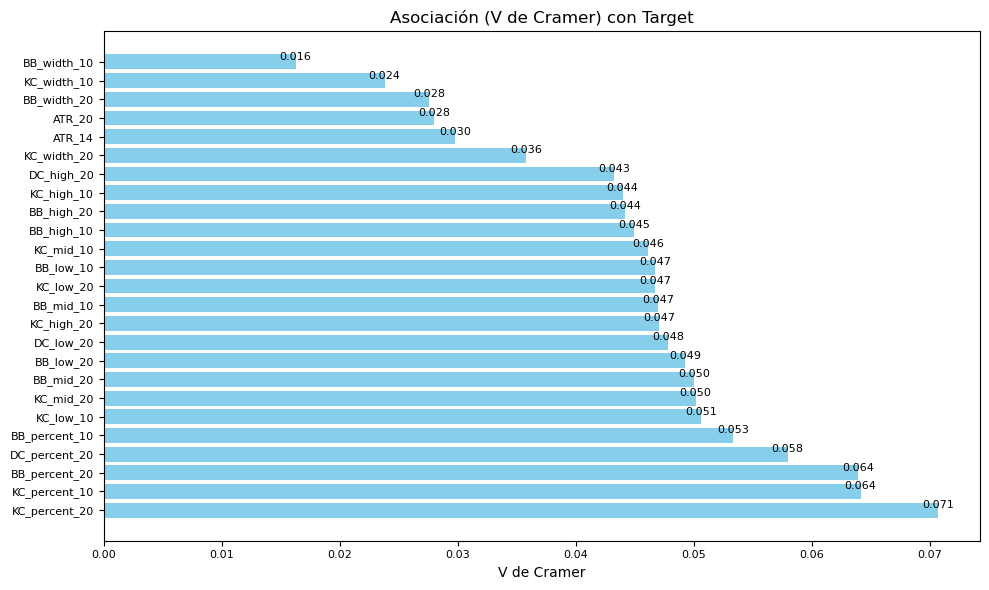

In [51]:
# --- V de Cramer
target = df_ta_volatilidad['Target'] # Variable objetivo
inputs = df_ta_volatilidad.drop(['Target'], axis = 1) # Variables descriptivas

graficoVcramer(inputs, target)

##### 📝 Análisis de Componentes Principales (PCA):

In [52]:
# =============================================================================
# ANÁLISIS PCA - INDICADORES TÉCNICOS DE VOLATILIDAD
# =============================================================================

# -------------------------------- Estandarizamos los datos
df_ta_volatilidad = df_ta_volatilidad.drop(['Target'], axis = 1) # Variables descriptivas
numericas = list(df_ta_volatilidad.select_dtypes(include=['int', 'int32', 'int64','float', 'float32', 'float64']).columns)

df_ta_volatilidad_std = pd.DataFrame(
    StandardScaler().fit_transform(df_ta_volatilidad),  # Datos estandarizados
    columns=['{}_z'.format(variable) for variable in numericas],  # Nombres de columnas estandarizadas
    index=df_ta_volatilidad.index  # Índices (etiquetas de filas) del DataFrame
)

df_ta_volatilidad_std

,BB_high_10_z,BB_low_10_z,BB_mid_10_z,BB_width_10_z,BB_percent_10_z,BB_high_20_z,BB_low_20_z,BB_mid_20_z,BB_width_20_z,BB_percent_20_z,...,KC_width_10_z,KC_percent_10_z,KC_high_20_z,KC_low_20_z,KC_mid_20_z,KC_percent_20_z,KC_width_20_z,DC_high_20_z,DC_low_20_z,DC_percent_20_z
0,-1.013643,-0.977795,-0.998059,-0.913921,0.202549,-1.026490,-0.978849,-1.007141,-0.913187,0.653848,...,-0.992324,0.102864,-1.013583,-0.999562,-1.007123,0.416622,-0.998443,-1.028899,-0.980439,0.708608
1,-1.015845,-0.971839,-0.996380,-0.968547,0.667933,-1.025305,-0.977772,-1.006003,-0.911891,0.768576,...,-0.992473,0.215406,-1.013090,-0.997752,-1.005995,0.557877,-1.012549,-1.028899,-0.979362,0.934919
2,-1.014905,-0.971209,-0.995586,-0.965900,0.921753,-1.024125,-0.976433,-1.004746,-0.911822,0.817135,...,-1.008649,0.346652,-1.011959,-0.996238,-1.004679,0.606987,-1.015824,-1.028899,-0.979114,1.107787
3,-1.011187,-0.971937,-0.993980,-0.934440,1.751561,-1.021457,-0.977242,-1.003693,-0.894115,1.201241,...,-1.006032,1.039480,-1.011246,-0.994747,-1.003591,1.078194,-1.023794,-1.025786,-0.979114,1.507537
4,-1.006491,-0.972680,-0.991867,-0.895859,1.703007,-1.018049,-0.977887,-1.002168,-0.873274,1.310769,...,-1.003867,1.356265,-1.009768,-0.993451,-1.002201,1.304688,-1.020572,-1.018292,-0.979114,1.304285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2872,2.857988,3.032450,2.945259,0.781933,-0.561340,2.781248,3.065209,2.921642,0.585763,0.005219,...,1.226498,-0.460757,2.868440,2.989130,2.927447,-0.117355,1.058374,2.844858,3.140380,-0.391524
2873,2.858009,3.031941,2.945028,0.785397,-0.547821,2.779484,3.064786,2.920498,0.578439,0.023046,...,1.075723,-0.511621,2.865614,2.989595,2.926206,-0.104050,1.019768,2.844858,3.140380,-0.384819
2874,2.859567,3.026978,2.943483,0.828926,-0.988560,2.776185,3.062150,2.917500,0.573171,-0.306767,...,1.164402,-0.816587,2.863363,2.985075,2.922861,-0.318673,1.042899,2.844858,3.140380,-0.709153
2875,2.885176,2.972719,2.931096,1.366388,-1.718345,2.776742,3.043003,2.908860,0.663634,-1.188706,...,1.345112,-1.581734,2.859386,2.977193,2.917000,-0.934901,1.082604,2.844858,3.140380,-1.632659


In [53]:
# -------------------------------- Analisis PCA Inicial:
# Creamos la instancia de PCA a través de la librería scikit-learn partiendo del número máximo de componentes principales (25), 
# el cual coincide con el número de variables numéricas de nuestro conjunto de datos:

pca = PCA(n_components=25)

# Aplicar el Análisis de Componentes Principales (ACP) a los datos estandarizados:
fit = pca.fit(df_ta_volatilidad_std)

In [54]:
# -------------------------------- Determinar Número de Componentes:
# Obtener los autovalores asociados a cada componente principal.
autovalores = fit.explained_variance_

# Obtener la varianza explicada por cada componente principal como un porcentaje de la varianza total.
var_explicada = fit.explained_variance_ratio_*100

# Calcular la varianza explicada acumulada a medida que se agregan cada componente principal.
var_acumulada = np.cumsum(var_explicada)

# Crear un DataFrame de pandas con los datos anteriores y establecer índice.
data = {'Autovalores': autovalores, 'Variabilidad Explicada': var_explicada, 'Variabilidad Acumulada': var_acumulada}
tabla = pd.DataFrame(data, index=['Componente {}'.format(i) for i in range(1, fit.n_components_+1)]) 

# Imprimir la tabla
print(tabla)

                Autovalores  Variabilidad Explicada  Variabilidad Acumulada
Componente 1   1.805184e+01            7.218224e+01               72.182244
Componente 2   4.489087e+00            1.795011e+01               90.132349
Componente 3   1.397514e+00            5.588112e+00               95.720461
Componente 4   3.493335e-01            1.396848e+00               97.117309
Componente 5   2.647319e-01            1.058560e+00               98.175869
Componente 6   1.765054e-01            7.057763e-01               98.881645
Componente 7   1.503868e-01            6.013379e-01               99.482983
Componente 8   4.370834e-02            1.747726e-01               99.657755
Componente 9   3.836030e-02            1.533879e-01               99.811143
Componente 10  3.062381e-02            1.224527e-01               99.933596
Componente 11  1.145927e-02            4.582113e-02               99.979417
Componente 12  3.271647e-03            1.308204e-02               99.992499
Componente 1

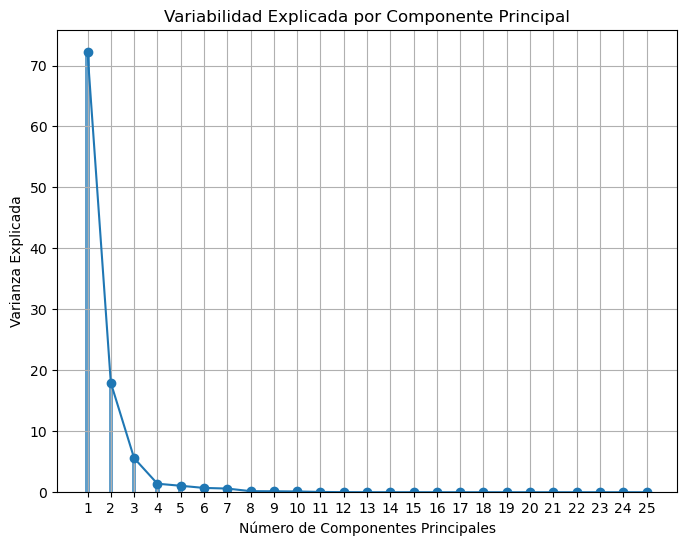

In [55]:
# -------------------------------- Gráfico del codo:
plot_varianza_explicada(var_explicada, fit.n_components_)

Se observa que la proporción de varianza explicada por cada componente principal disminuye de manera gradual y tiende a estabilizarse a partir de la tercera. Por este motivo, se opta por **conservar únicamente tres de las veinticinco componentes principales**, ya que en conjunto explican aproximadamente el 95.72% de la variabilidad presente en las variables originales.

- **Componente 1**: explica 72.18% de la variabilidad.
- **Componente 2**: explica 17.95% de la variabilidad.
- **Componente 3**: explica 5.58 de la variabilidad.

Examinamos **cómo se relacionan las variables originales con las componentes seleccionadas** mediante la matriz de correlación.

In [56]:
# -------------------------------- Relación entre variables y componentes:
# Crea una instancia de ACP con las tres primeras componentes que nos interesan y aplicar a los datos.
pca = PCA(n_components=3)
fit = pca.fit(df_ta_volatilidad_std)

# Calculamos las tres primeras componentes principales
resultados_pca = pd.DataFrame(fit.transform(df_ta_volatilidad_std), 
                              columns=['Componente {}'.format(i) for i in range(1, fit.n_components_+1)],
                              index=df_ta_volatilidad_std.index)

# Añadimos las componentes principales a la base de datos estandarizada.
df_ta_volatilidad_z_cp = pd.concat([df_ta_volatilidad_std, resultados_pca], axis=1)

# Calculo la matriz de correlaciones entre veriables y componentes
Correlaciones_var_comp = df_ta_volatilidad_z_cp.corr()
Correlaciones_var_comp = Correlaciones_var_comp.iloc[:fit.n_features_in_, fit.n_features_in_:]
Correlaciones_var_comp

,Componente 1,Componente 2,Componente 3
BB_high_10_z,0.992613,-0.021316,-0.106993
BB_low_10_z,0.980029,-0.013816,-0.194556
BB_mid_10_z,0.988077,-0.017776,-0.148848
BB_width_10_z,0.748265,-0.063166,0.498585
BB_percent_10_z,-0.015309,-0.915855,0.003340
BB_high_20_z,0.994946,-0.002632,-0.089826
BB_low_20_z,0.975521,0.017942,-0.214508
BB_mid_20_z,0.988681,0.006965,-0.148284
BB_width_20_z,0.762812,-0.095851,0.509213
BB_percent_20_z,-0.021287,-0.977751,-0.036278


##### 🔎 **INTERPRETACIÓN**

**Componente 1:**
- Relación directa (>0.80):
   - `BB_high_10_z` (0.993) y `BB_low_10_z` (0.980): Bollinger Bands (10 días)
   - `BB_mid_10_z` (0.988): Línea media Bollinger (10 días)
   - `BB_high_20_z` (0.995) y `BB_low_20_z` (0.976): Bollinger Bands (20 días)
   - `BB_mid_20_z` (0.989): Línea media Bollinger (20 días)
   - `KC_high_10_z` (0.991), `KC_low_10_z` (0.984), `KC_mid_10_z` (0.988): Keltner Channel (10 días)
   - `KC_high_20_z` (0.991), `KC_low_20_z` (0.985), `KC_mid_20_z` (0.988): Keltner Channel (20 días)
   - `DC_high_20_z` (0.995) y `DC_low_20_z` (0.975): Donchian Channel (20 días)
   - `ATR_14_z` (0.913) y `ATR_20_z` (0.918): Average True Range
   - `KC_width_20_z` (0.900): Ancho del Keltner Channel (20 días)
- Relación moderada (0.40-0.80):
   - `BB_width_10_z` (0.748) y `BB_width_20_z` (0.763): Ancho de Bollinger Bands
   - `KC_width_10_z` (0.882): Ancho del Keltner Channel (10 días)
      
**Componente 2:**
- Relación directa (>0.80):
   - `BB_percent_10_z` (-0.916) y `BB_percent_20_z` (-0.978): % de Posición dentro de Bollinger Bands (relación inversa)
   - `KC_percent_10_z` (-0.955) y `KC_percent_20_z` (-0.940): % de Posición dentro de Keltner Channel (relación inversa)
   - `DC_percent_20_z` (-0.934): % de Posición dentro de Donchian Channel (relación inversa)
- Relación moderada (0.40-0.80): Ninguna variable supera el umbral moderado

**Componente 3:**
- Relación directa (>0.80): Ninguna variable supera 0.80
- Relación moderada (0.40-0.80):
   - `BB_width_10_z` (0.499) y `KC_width_10_z` (0.428): Ancho de Bollinger Bands y Keltner Channel (10 días)
   - `BB_width_20_z` (0.509) y `KC_width_20_z` (0.365): Ancho de Bollinger Bands y Keltner Channel (20 días)
   - `ATR_14_z` (0.336) y `ATR_20_z` (0.321): Average True Range (14, 20  días)

<br>

> 🧠 **RESUMEN:** Los 3 componentes explican un alto porcentaje de la variabilidad total, transformando 25 indicadores de volatilidad en 3 componentes:
> - **PC1**: Nivel general de volatilidad y posición absoluta del precio (factor dominante)
> - **PC2**: Posición relativa dentro de los canales de volatilidad (factor de ubicación)
> - **PC3**: Variaciones específicas en la amplitud de los canales (factor de expansión/contracción)


Para finalizar, **incorporamos los tres componentes principales seleccionados al conjunto de datos principal** (`df_bitcoin`) y eliminamos las variables originales:

In [57]:
# =============================================================================
# INCLUIMOS RESULTADOS PCA TA VOLATILIDAD EN DF_BITCOIN
# =============================================================================

# Renombrar las columnas de resultados_pca
resultados_pca.columns = ['c{}_ta_volatilidad'.format(i) for i in range(1, resultados_pca.shape[1] + 1)]

# Descartamos columnas ta tendencia originales
df_bitcoin = df_bitcoin.drop(list(df_ta_volatilidad.columns), axis = 1)

# Añadir las columnas al DataFrame df_bitcoin
df_bitcoin = df_bitcoin.join(resultados_pca)

#### ➡️ INDICADORES TÉCNICOS DE VOLUMEN

#### ➡️ VARIABLES DE BLOCKCHAIN